# Surprise-Housing Price Prediction Case Study
Surprise Housing, a US-based housing company, has decided to join the Australian market. The organization employs data analytics to buy houses at a lower price than their true value and resell them at a higher price.

The company is seeking for potential properties to purchase in order to enter the market. The requirement is to create a regression model with regularisation in order to estimate the actual value of potential properties and determine whether or not to invest in them.
The organization seeks to determine which characteristics accurately forecast housing prices.

### Business Goal



The organization seeks to determine

    - Which variables are significant in predicting the price of a house, and
    - How well those variables describe the price of a house.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

# Importing the required library

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

# importing warning package to ignore the warnings
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import HTML, display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


Reading the Data

In [2]:
# Reading and inspecting the dataframe

sh_data = pd.read_csv("train.csv")
sh_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [3]:
sh_data.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1   BsmtFinSF1 BsmtFinType2   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional   Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish   GarageCars   GarageArea GarageQual GarageCond PavedDrive   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea PoolQC  Fence MiscFeature       MiscVal       MoSold       YrSold SaleType SaleCondition      SalePrice
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460    91     1460        1460      1460      1460      1460         1460       1460       1460     1460       1460  1460.000000  1460.000000  1460.000000   1460.000000      1460     1460        1460        1460        588  1452.000000      1460      1460       1460     1423     1423         1422         1423  1460.000000         1422  1460.000000  1460.000000  1460.000000    1460      1460       1460       1459  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000        1460   1460.000000       1460  1460.000000         770       1379  1379.000000         1379  1460.000000  1460.000000       1379       1379       1460  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000      7    281          54   1460.000000  1460.000000  1460.000000     1460          1460    1460.000000
unique          NaN          NaN        5          NaN            NaN      2     2        4           4         2         5         3           25          9          8        5          8          NaN          NaN          NaN           NaN         6        8          15          16          3          NaN         4         5          6        4        4            4            6          NaN            6          NaN          NaN          NaN       6         5          2          5          NaN          NaN           NaN          NaN           NaN           NaN          NaN          NaN           NaN           NaN           4           NaN          7          NaN           5          6          NaN            3          NaN          NaN          5          5          3          NaN          NaN            NaN          NaN          NaN          NaN      3      4           4           NaN          NaN          NaN        9             6            NaN
top             NaN          NaN       RL          NaN            NaN   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm       Norm     1Fam     1Story          NaN          NaN          NaN           NaN     Gable  CompShg     VinylSd     VinylSd    BrkFace          NaN        TA        TA      PConc       TA       TA           No          Unf          NaN          Unf          NaN          NaN          NaN    GasA        Ex          Y      SBrkr          NaN          NaN           NaN          NaN           NaN           NaN          NaN          NaN           NaN           NaN          TA           NaN        Typ          NaN          Gd     Attchd          NaN          Unf          NaN          NaN         TA         TA          Y          NaN          NaN            NaN          NaN          NaN          NaN     Gd  MnPrv        Shed           NaN          NaN          NaN       WD        Normal            NaN
freq            NaN          NaN     1151          NaN            NaN   1454    50      925        1311      1459      1052      1382          225       

### Understanding the Data

In [4]:
# Checking the basic information
sh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
sh_data.shape

(1460, 81)

### Data Cleaning 

#### Handling Null Values

In [6]:
# count the number of null values present in the data

round(sh_data.isnull().sum()/len(sh_data.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [7]:
dcsh_data = sh_data

In [8]:
total = dcsh_data.isnull().sum().sort_values(ascending=False)
percent = (dcsh_data.isnull().sum()/dcsh_data.isnull().count()).sort_values(ascending=False)

#Check the missing values as percentage
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

In [9]:
# Function to return columns with null values as percentage
def columns_with_missing_values():
    total = dcsh_data.isnull().sum().sort_values(ascending=False)
    percent = round(dcsh_data.isnull().sum()*100/len(dcsh_data), 2).sort_values(ascending=False)
    
    all_features = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    all_features = all_features[all_features.Total != 0]
    
    if len(all_features) == 0:
        return 'No Column with Missing Values.'
    return all_features
   
# Printing columns with null values
columns_with_missing_values()

Total  Percent
PoolQC         1453    99.52
MiscFeature    1406    96.30
Alley          1369    93.77
Fence          1179    80.75
MasVnrType      872    59.73
FireplaceQu     690    47.26
LotFrontage     259    17.74
GarageYrBlt      81     5.55
GarageCond       81     5.55
GarageType       81     5.55
GarageFinish     81     5.55
GarageQual       81     5.55
BsmtFinType2     38     2.60
BsmtExposure     38     2.60
BsmtQual         37     2.53
BsmtCond         37     2.53
BsmtFinType1     37     2.53
MasVnrArea        8     0.55
Electrical        1     0.07

Imputing the NA to None in Non-numeric columns 

In [10]:
# List of columns with NA has a definition in the sheet
columns_with_objtype_null = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageType", 
          "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtFinType1",
          "BsmtCond", "MasVnrType", "Electrical"]

for column in columns_with_objtype_null:
    before = dcsh_data[column].isnull().sum()
    dcsh_data[column].fillna("None", inplace=True)
    print(before, "missing values of", column ,"imputed.")

# Printing columns with null values
columns_with_missing_values()

1453 missing values of PoolQC imputed.
1406 missing values of MiscFeature imputed.
1369 missing values of Alley imputed.
1179 missing values of Fence imputed.
690 missing values of FireplaceQu imputed.
81 missing values of GarageCond imputed.
81 missing values of GarageType imputed.
81 missing values of GarageFinish imputed.
81 missing values of GarageQual imputed.
38 missing values of BsmtFinType2 imputed.
38 missing values of BsmtExposure imputed.
37 missing values of BsmtQual imputed.
37 missing values of BsmtFinType1 imputed.
37 missing values of BsmtCond imputed.
872 missing values of MasVnrType imputed.
1 missing values of Electrical imputed.


Total  Percent
LotFrontage    259    17.74
GarageYrBlt     81     5.55
MasVnrArea       8     0.55

Imputing the numeric Float columns

In [11]:
# List of columns where Median values can be imputed
columns_with_float_null = ["GarageYrBlt", "MasVnrArea", "LotFrontage"]

for column in columns_with_float_null:
    before = dcsh_data[column].isnull().sum()
    dcsh_data[column].fillna(0, inplace=True)
    print(before, "missing values of", column ,"imputed.")

# Printing columns with null values
columns_with_missing_values()

81 missing values of GarageYrBlt imputed.
8 missing values of MasVnrArea imputed.
259 missing values of LotFrontage imputed.


'No Column with Missing Values.'

In [12]:
# Checking if there are columns with one unique value since it won't affect our analysis
dcsh_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
Alley               3
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          6
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [13]:
#Checking the value count of some of the parameters
dcsh_data.PoolQC.value_counts()

PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64

In [14]:
#Checking the value count
#dcsh_data.LotFrontage.value_counts()

In [15]:
#Checking the value count
#dcsh_data.MasVnrArea.value_counts()

In [16]:
dcsh_data.shape

(1460, 81)

In [17]:
#dcsh_data.GarageYrBlt.value_counts()

In [18]:
dcsh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Performing EDA

In [19]:
#Taking the data into new df for EDA
h_data=dcsh_data

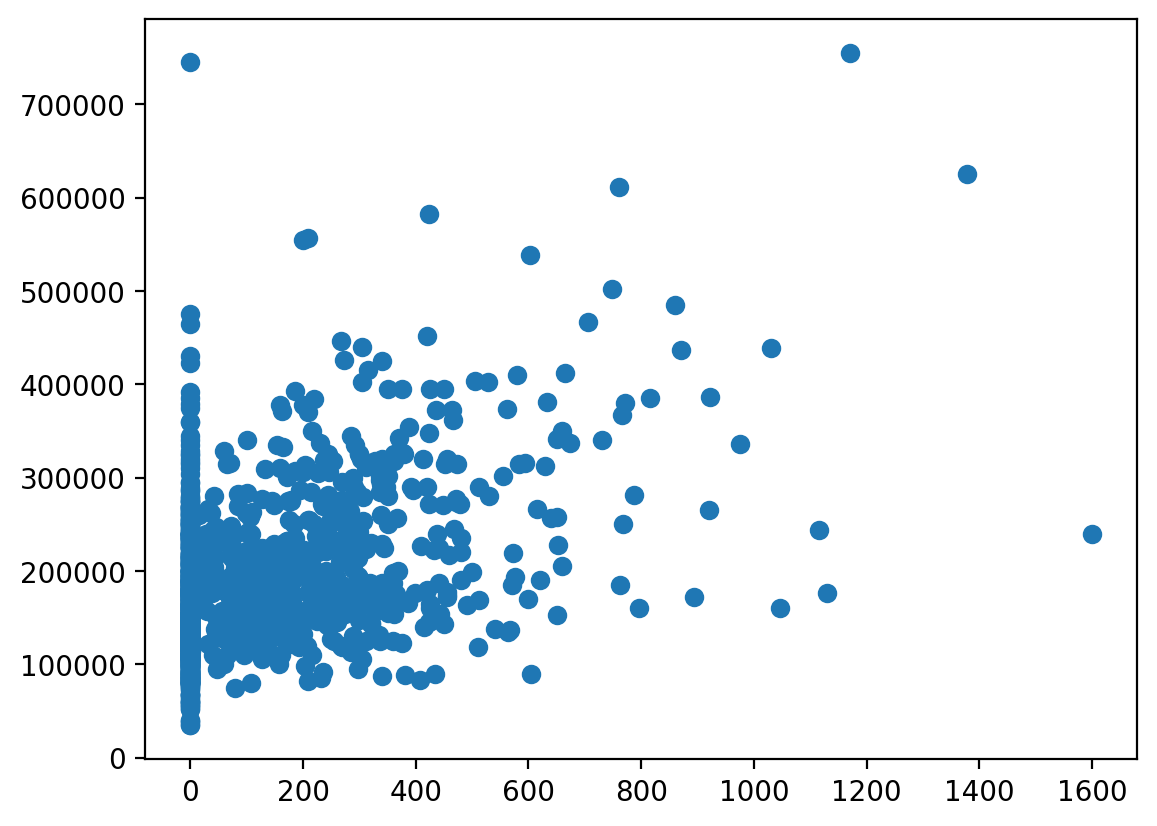

In [20]:
plt.scatter(h_data.MasVnrArea,h_data.SalePrice)

Text(0.5, 1.0, 'Veneer Area')

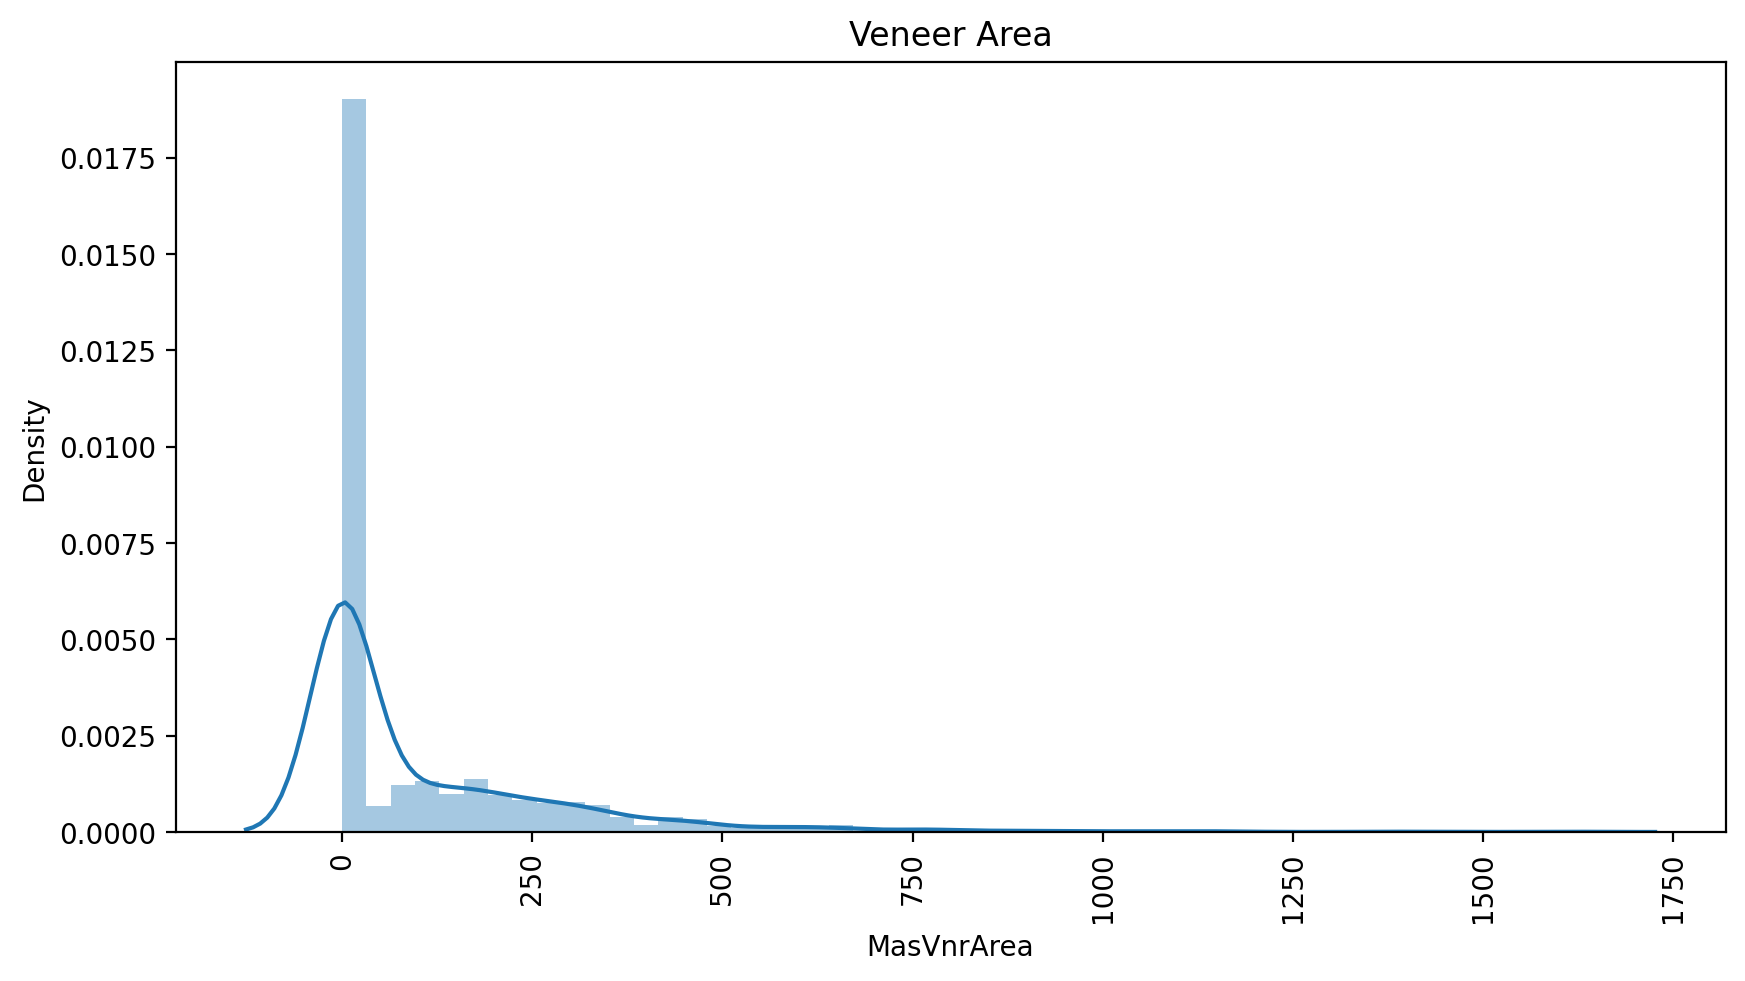

In [21]:
# plotting a distplot 
plt.figure(figsize = (10,5))
sns.distplot(h_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<Axes: xlabel='SalePrice', ylabel='Density'>

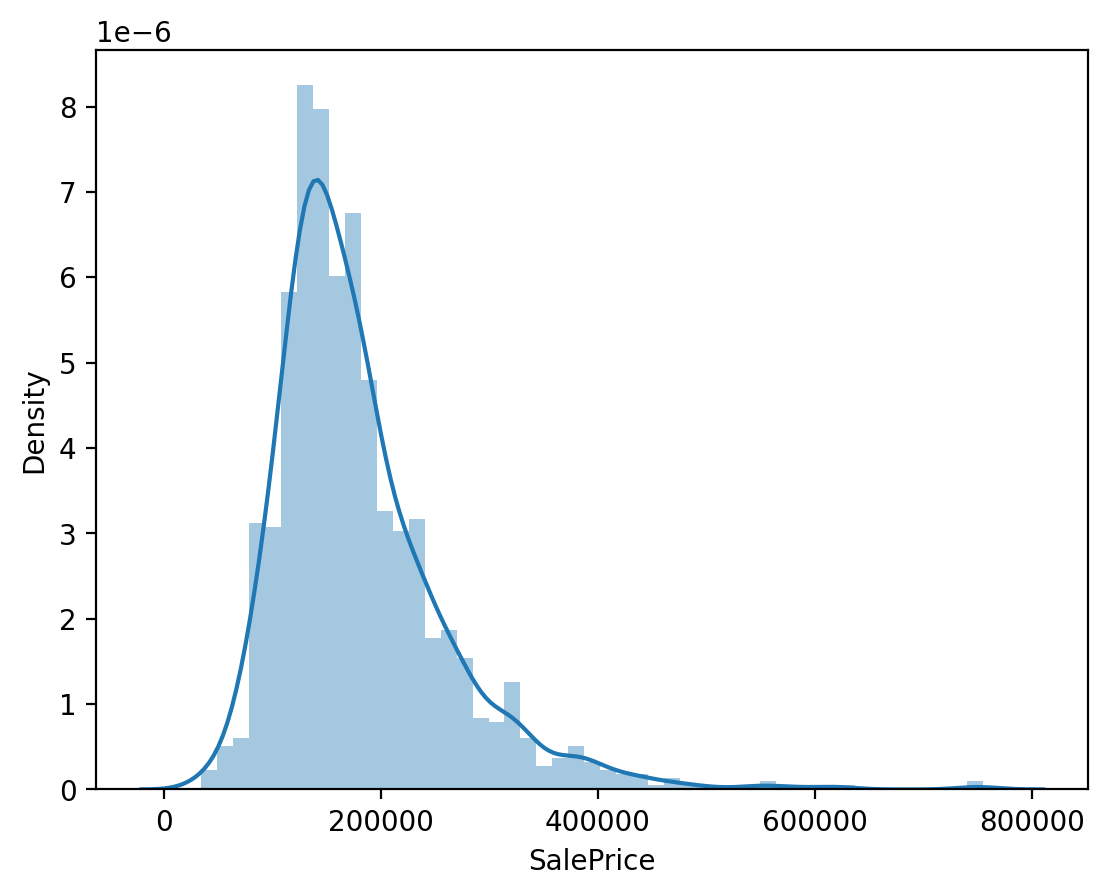

In [22]:
sns.distplot(h_data['SalePrice'])

In [23]:
print("Skewness: %f" % h_data['SalePrice'].skew())
print("Kurtosis: %f" % h_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

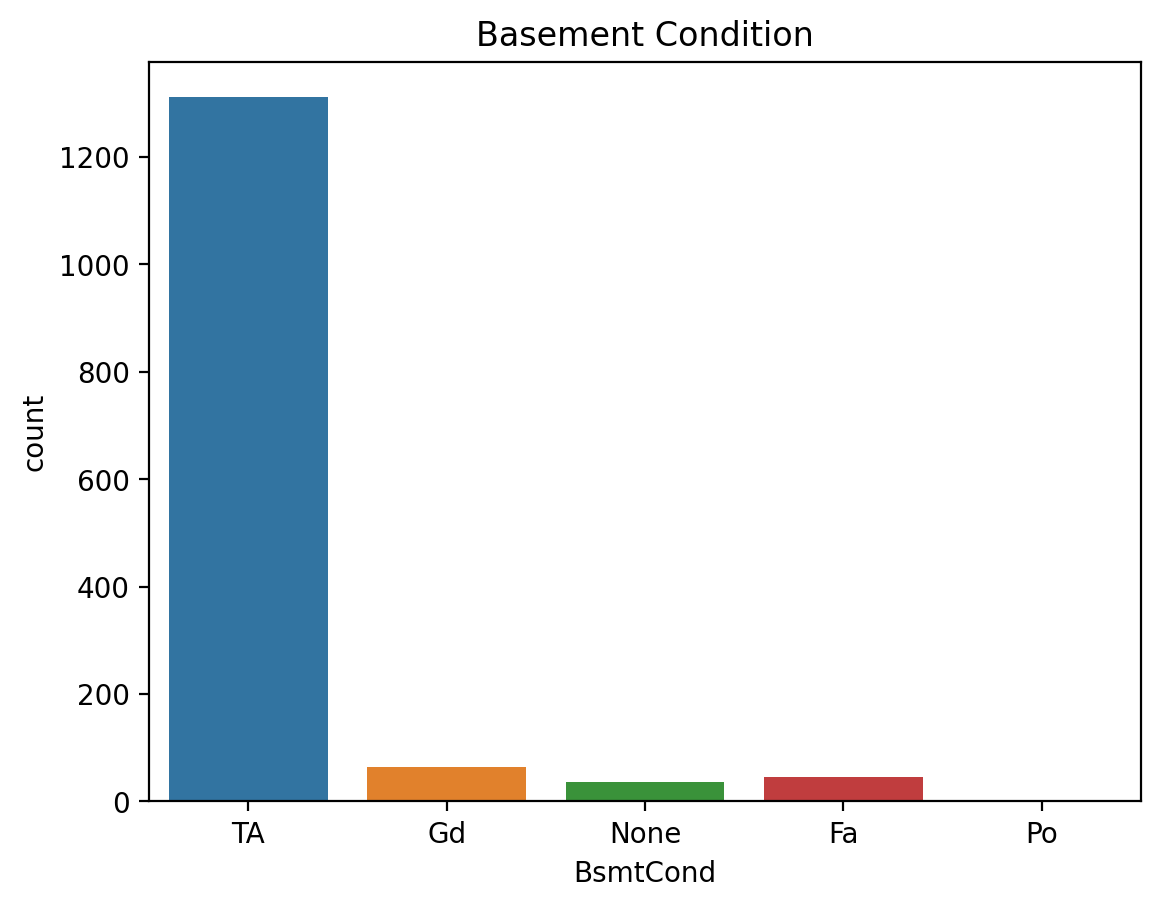

In [24]:
## Checking Basement counts
sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

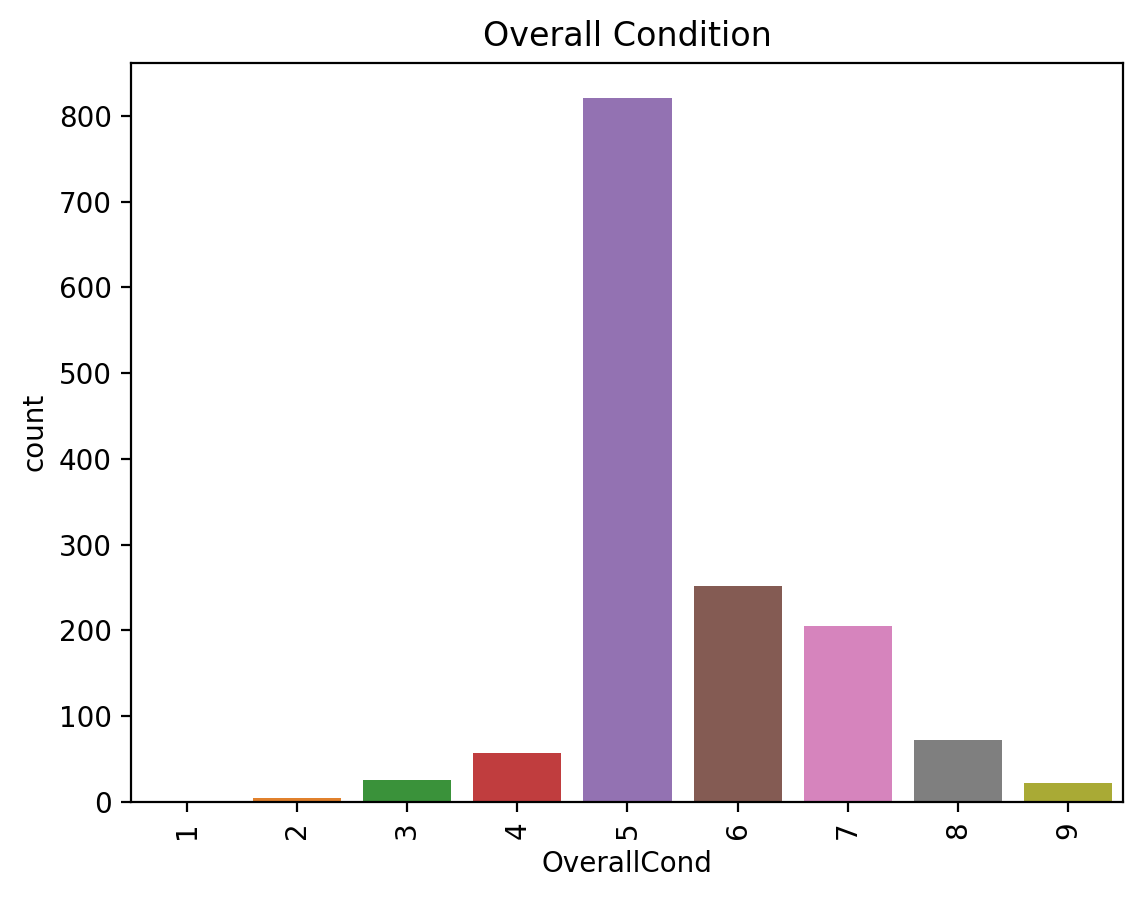

In [25]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

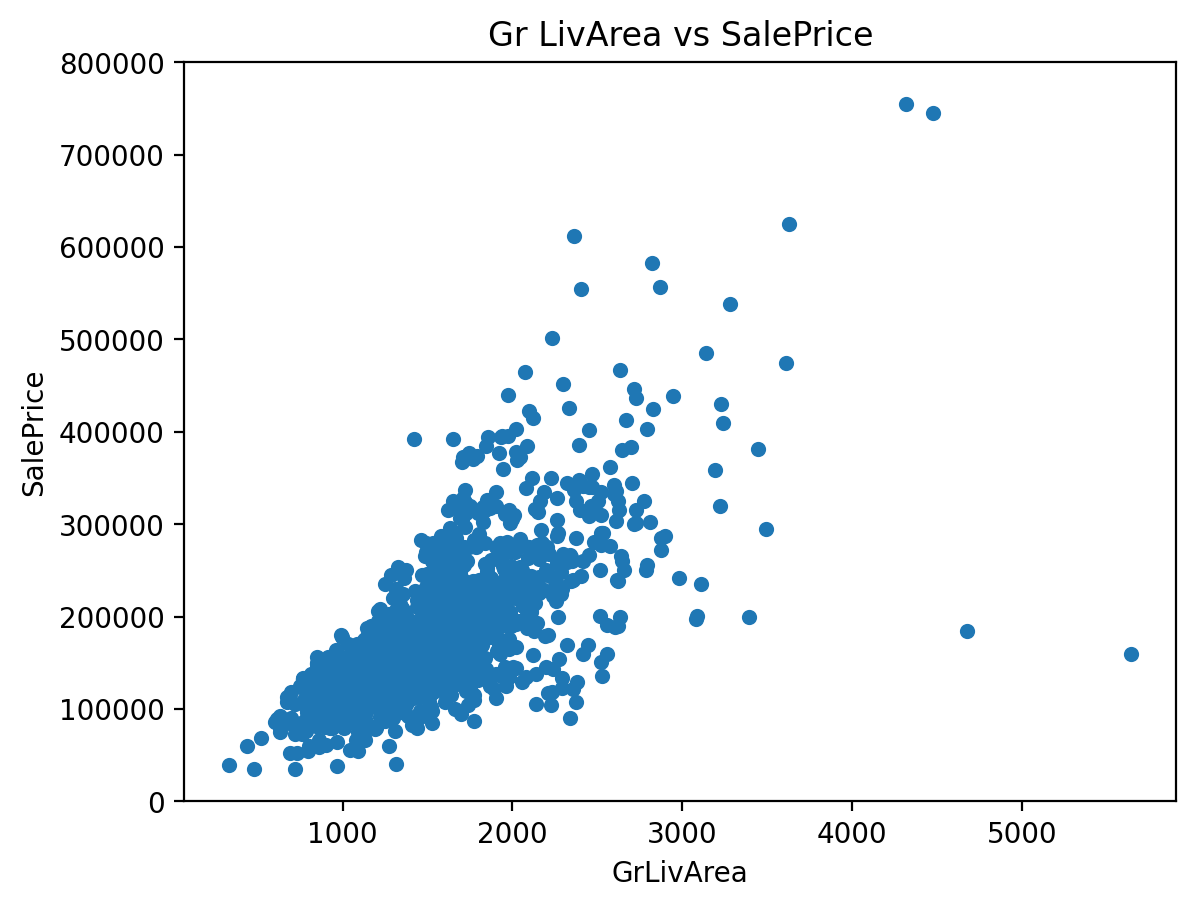

In [26]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

<Axes: ylabel='SalePrice'>

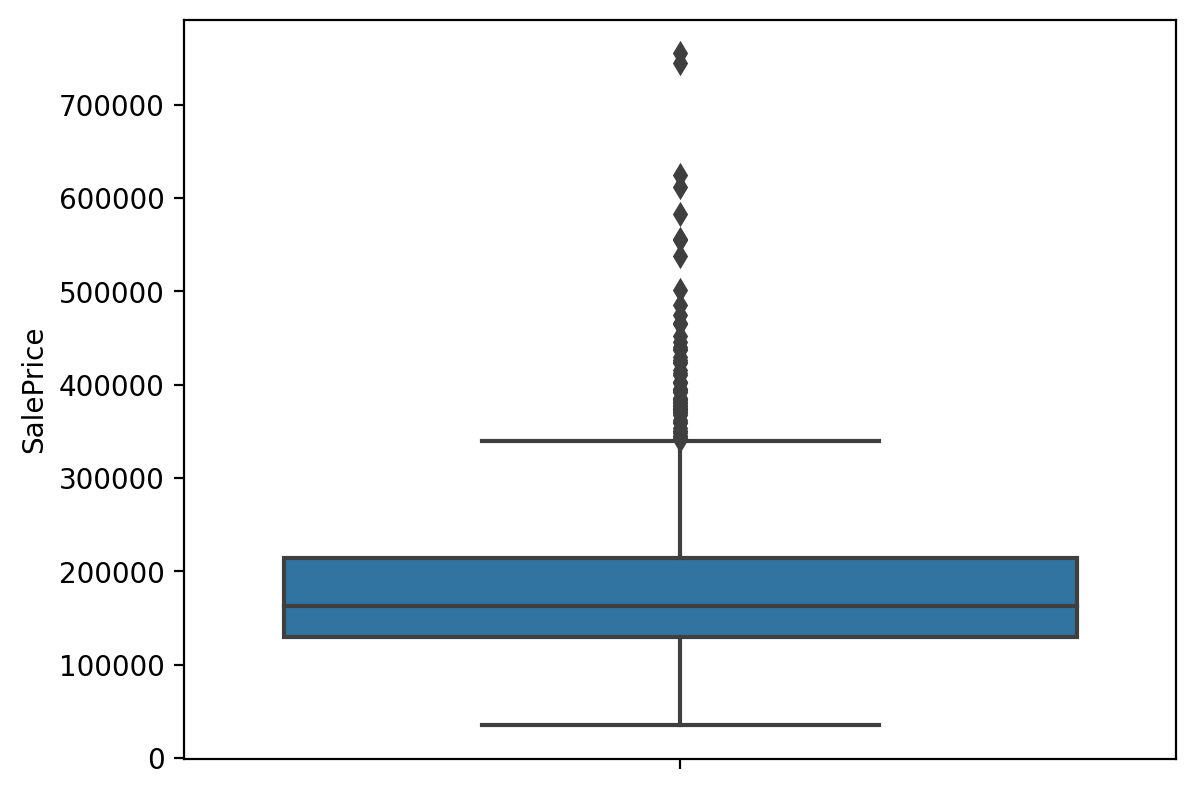

In [27]:
# Checking the outliers 

sns.boxplot(y='SalePrice', data=h_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

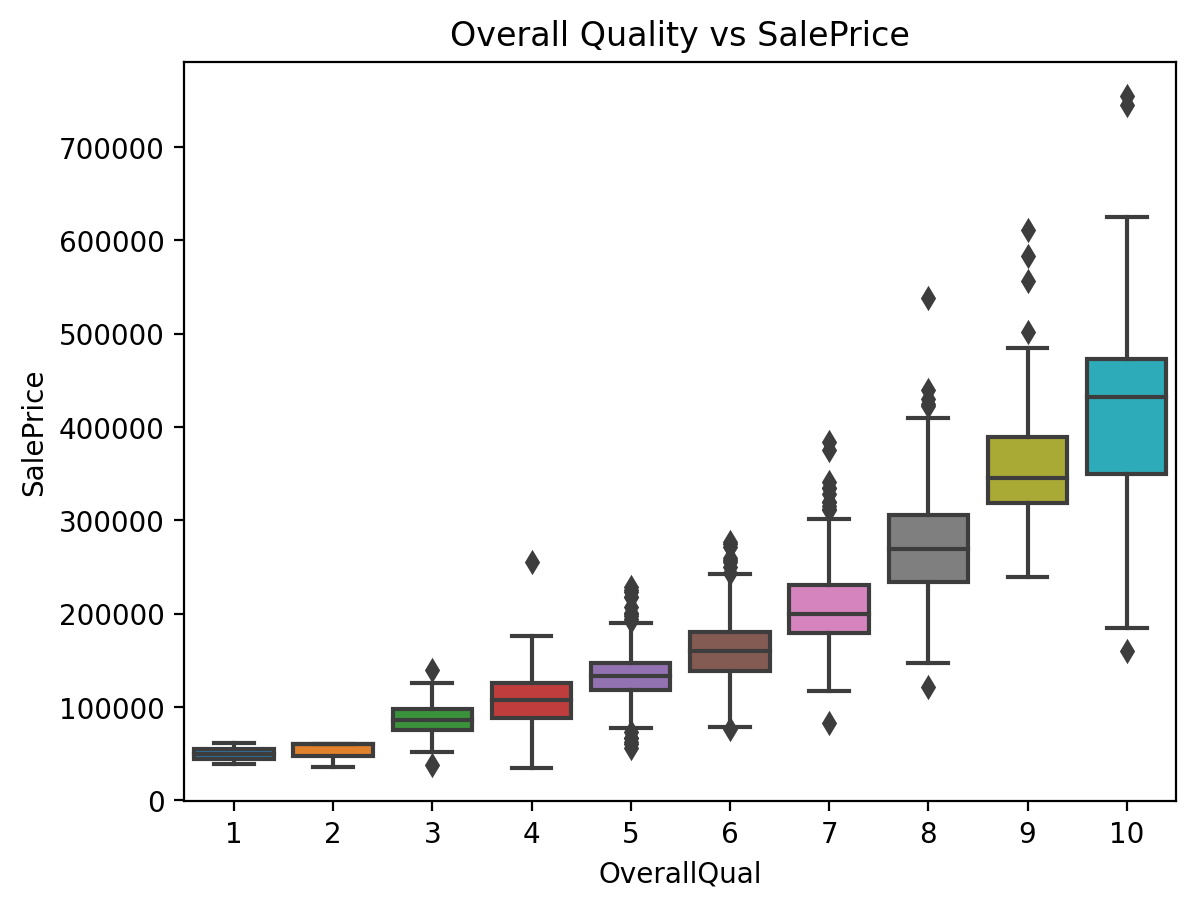

In [28]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

Text(0.5, 1.0, 'Correlation matrix ')

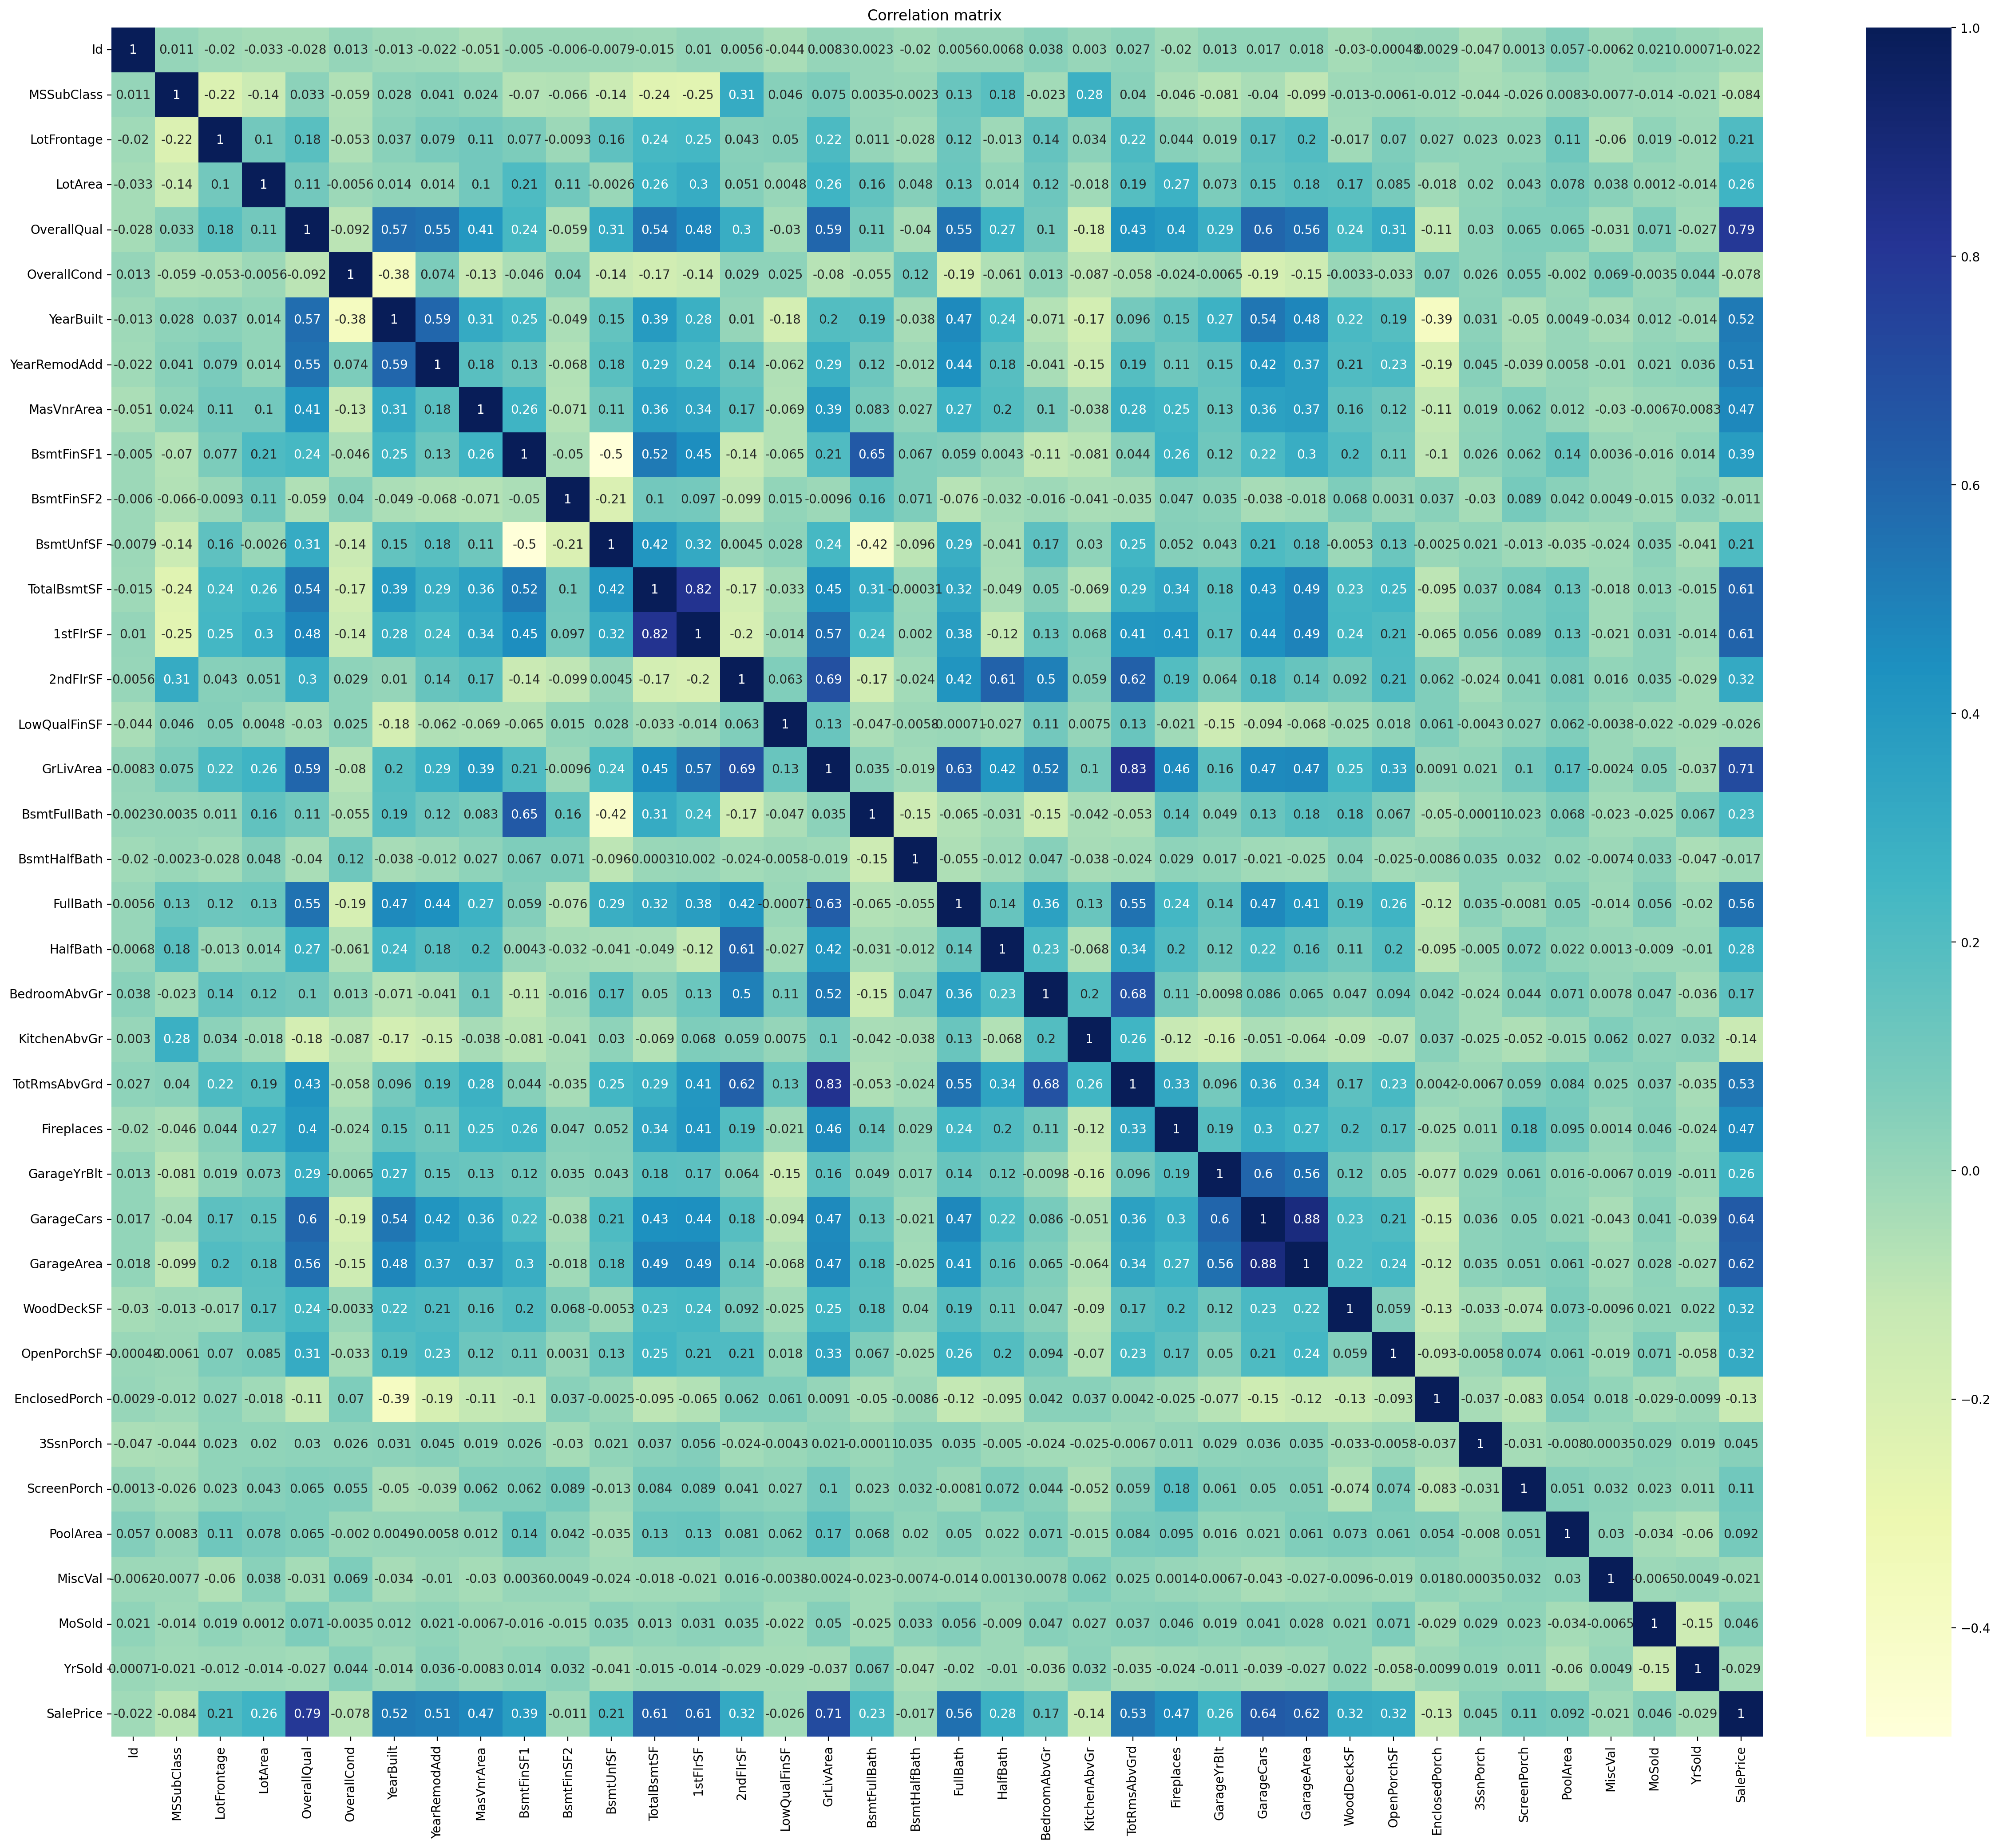

In [29]:
#correlation matrix
corrmat = h_data.corr(numeric_only=True) 
plt.figure(figsize = [30,25]) 
sns.heatmap(corrmat,annot =True, cmap= 'YlGnBu');
plt.title("Correlation matrix ")


 Some of the features have high correlation with each other
   - GarageCars and GarageArea
   - GarageYrBlt and YearBuilt
   - TotRmsAbvGrd and GrLivArea 
   - TotalBsmtSF and 1stflrSF


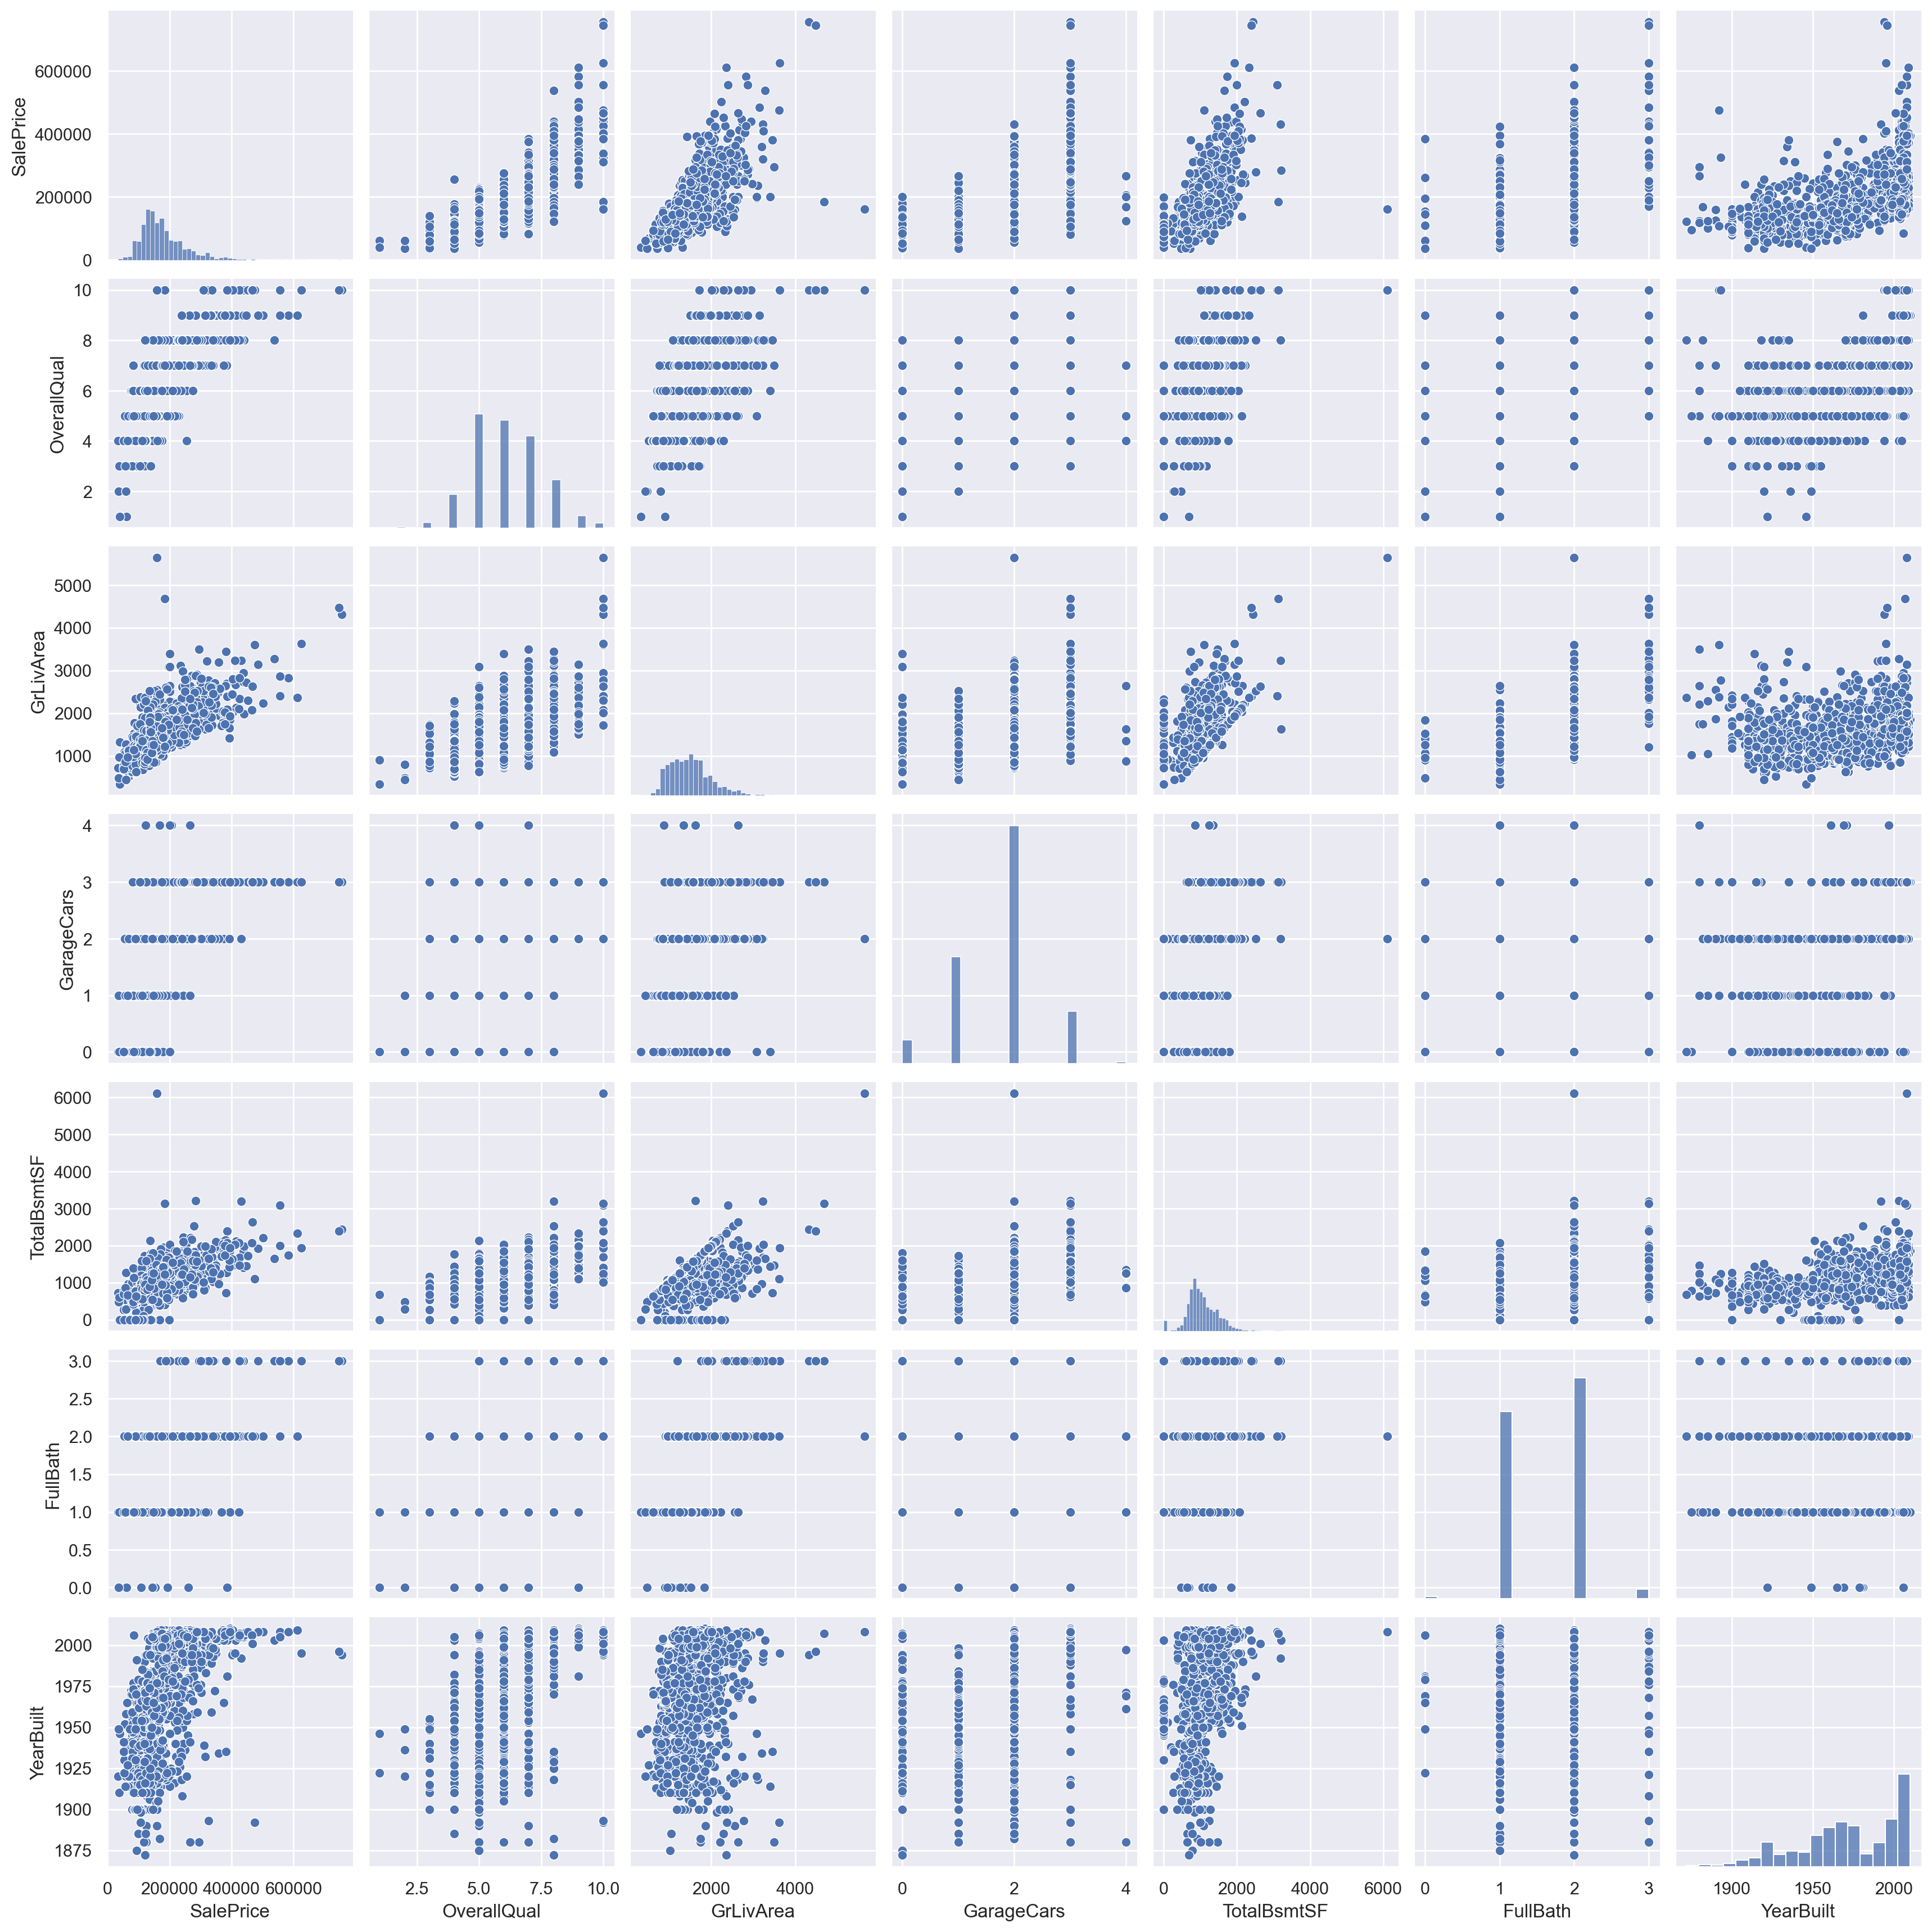

In [30]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

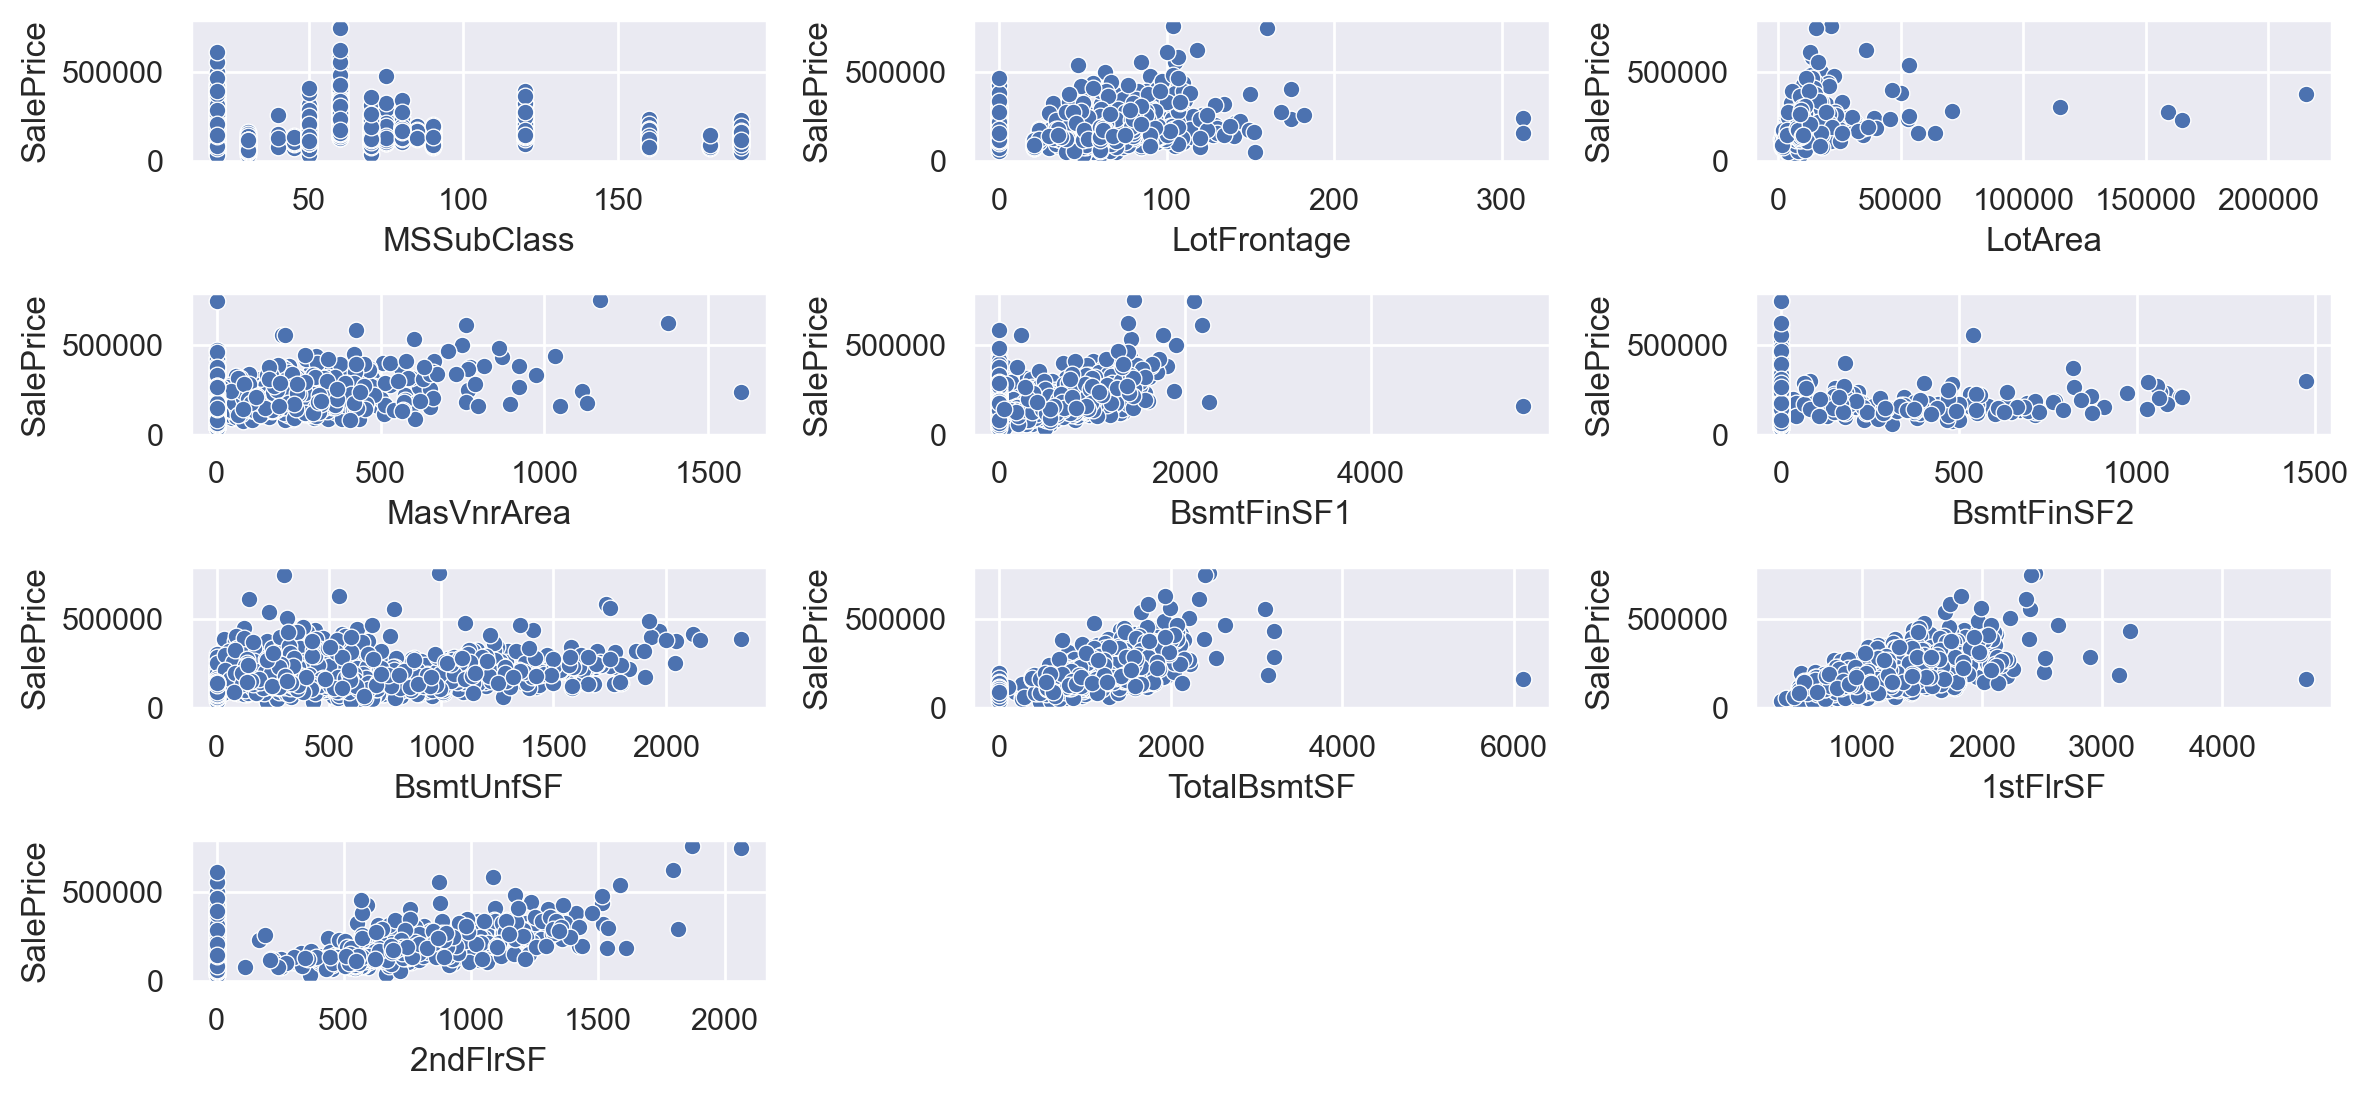

In [31]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
  
    sns.scatterplot(data=h_data, x=h_data[feature], y=h_data['SalePrice'])
    plt.tight_layout()


    Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' are showing positive correlation with SalePrice.
    'MSSubClass' has discrete values
    'BsmtSF2' has single value and can be dropped.


In [32]:
# Making all continuous columns (integer and float) in one dataset 
sh_num_df = h_data.select_dtypes(include=['float64', 'int64'])
print("Shape :", sh_num_df.shape)

sh_num_df.head()

Shape : (1460, 38)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice
0   1          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0          0            0         0        0       2    2008     208500
1   2          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0          0            0         0        0       5    2007     181500
2   3          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0          0            0         0        0       9    2008     223500
3   4          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272          0            0         0        0       2    2006     140000
4   5          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0          0            0         0        0      12    2008     250000

In [33]:
# Assuming df is your DataFrame
column_names = sh_num_df.columns.tolist()
print(column_names)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [34]:
# Dropping the 'Id' column
sh_num_df.drop(columns=["Id"], inplace=True)

In [35]:
# Target column name
sale_price_column = "SalePrice"

In [36]:
# Making all categoric variables (object) in one dataset 
sh_cat_df = h_data.select_dtypes(exclude=['float64', 'int64'])
print("Shape", sh_cat_df.shape)

sh_cat_df.head()

Shape (1460, 43)


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition
0       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           No          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ        None     Attchd          RFn         TA         TA          Y   None  None        None       WD        Normal
1       RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf    GasA        Ex          Y      SBrkr          TA        Typ          TA     Attchd          RFn         TA         TA          Y   None  None        None       WD        Normal
2       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y   None  None        None       WD        Normal
3       RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf    GasA        Gd          Y      SBrkr          Gd        Typ          Gd     Detchd          Unf         TA         TA          Y   None  None        None       WD       Abnorml
4       RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf    GasA        Ex          Y      SBrkr          Gd        Typ          TA     Attchd          RFn         TA         TA          Y   None  None        None       WD        Normal

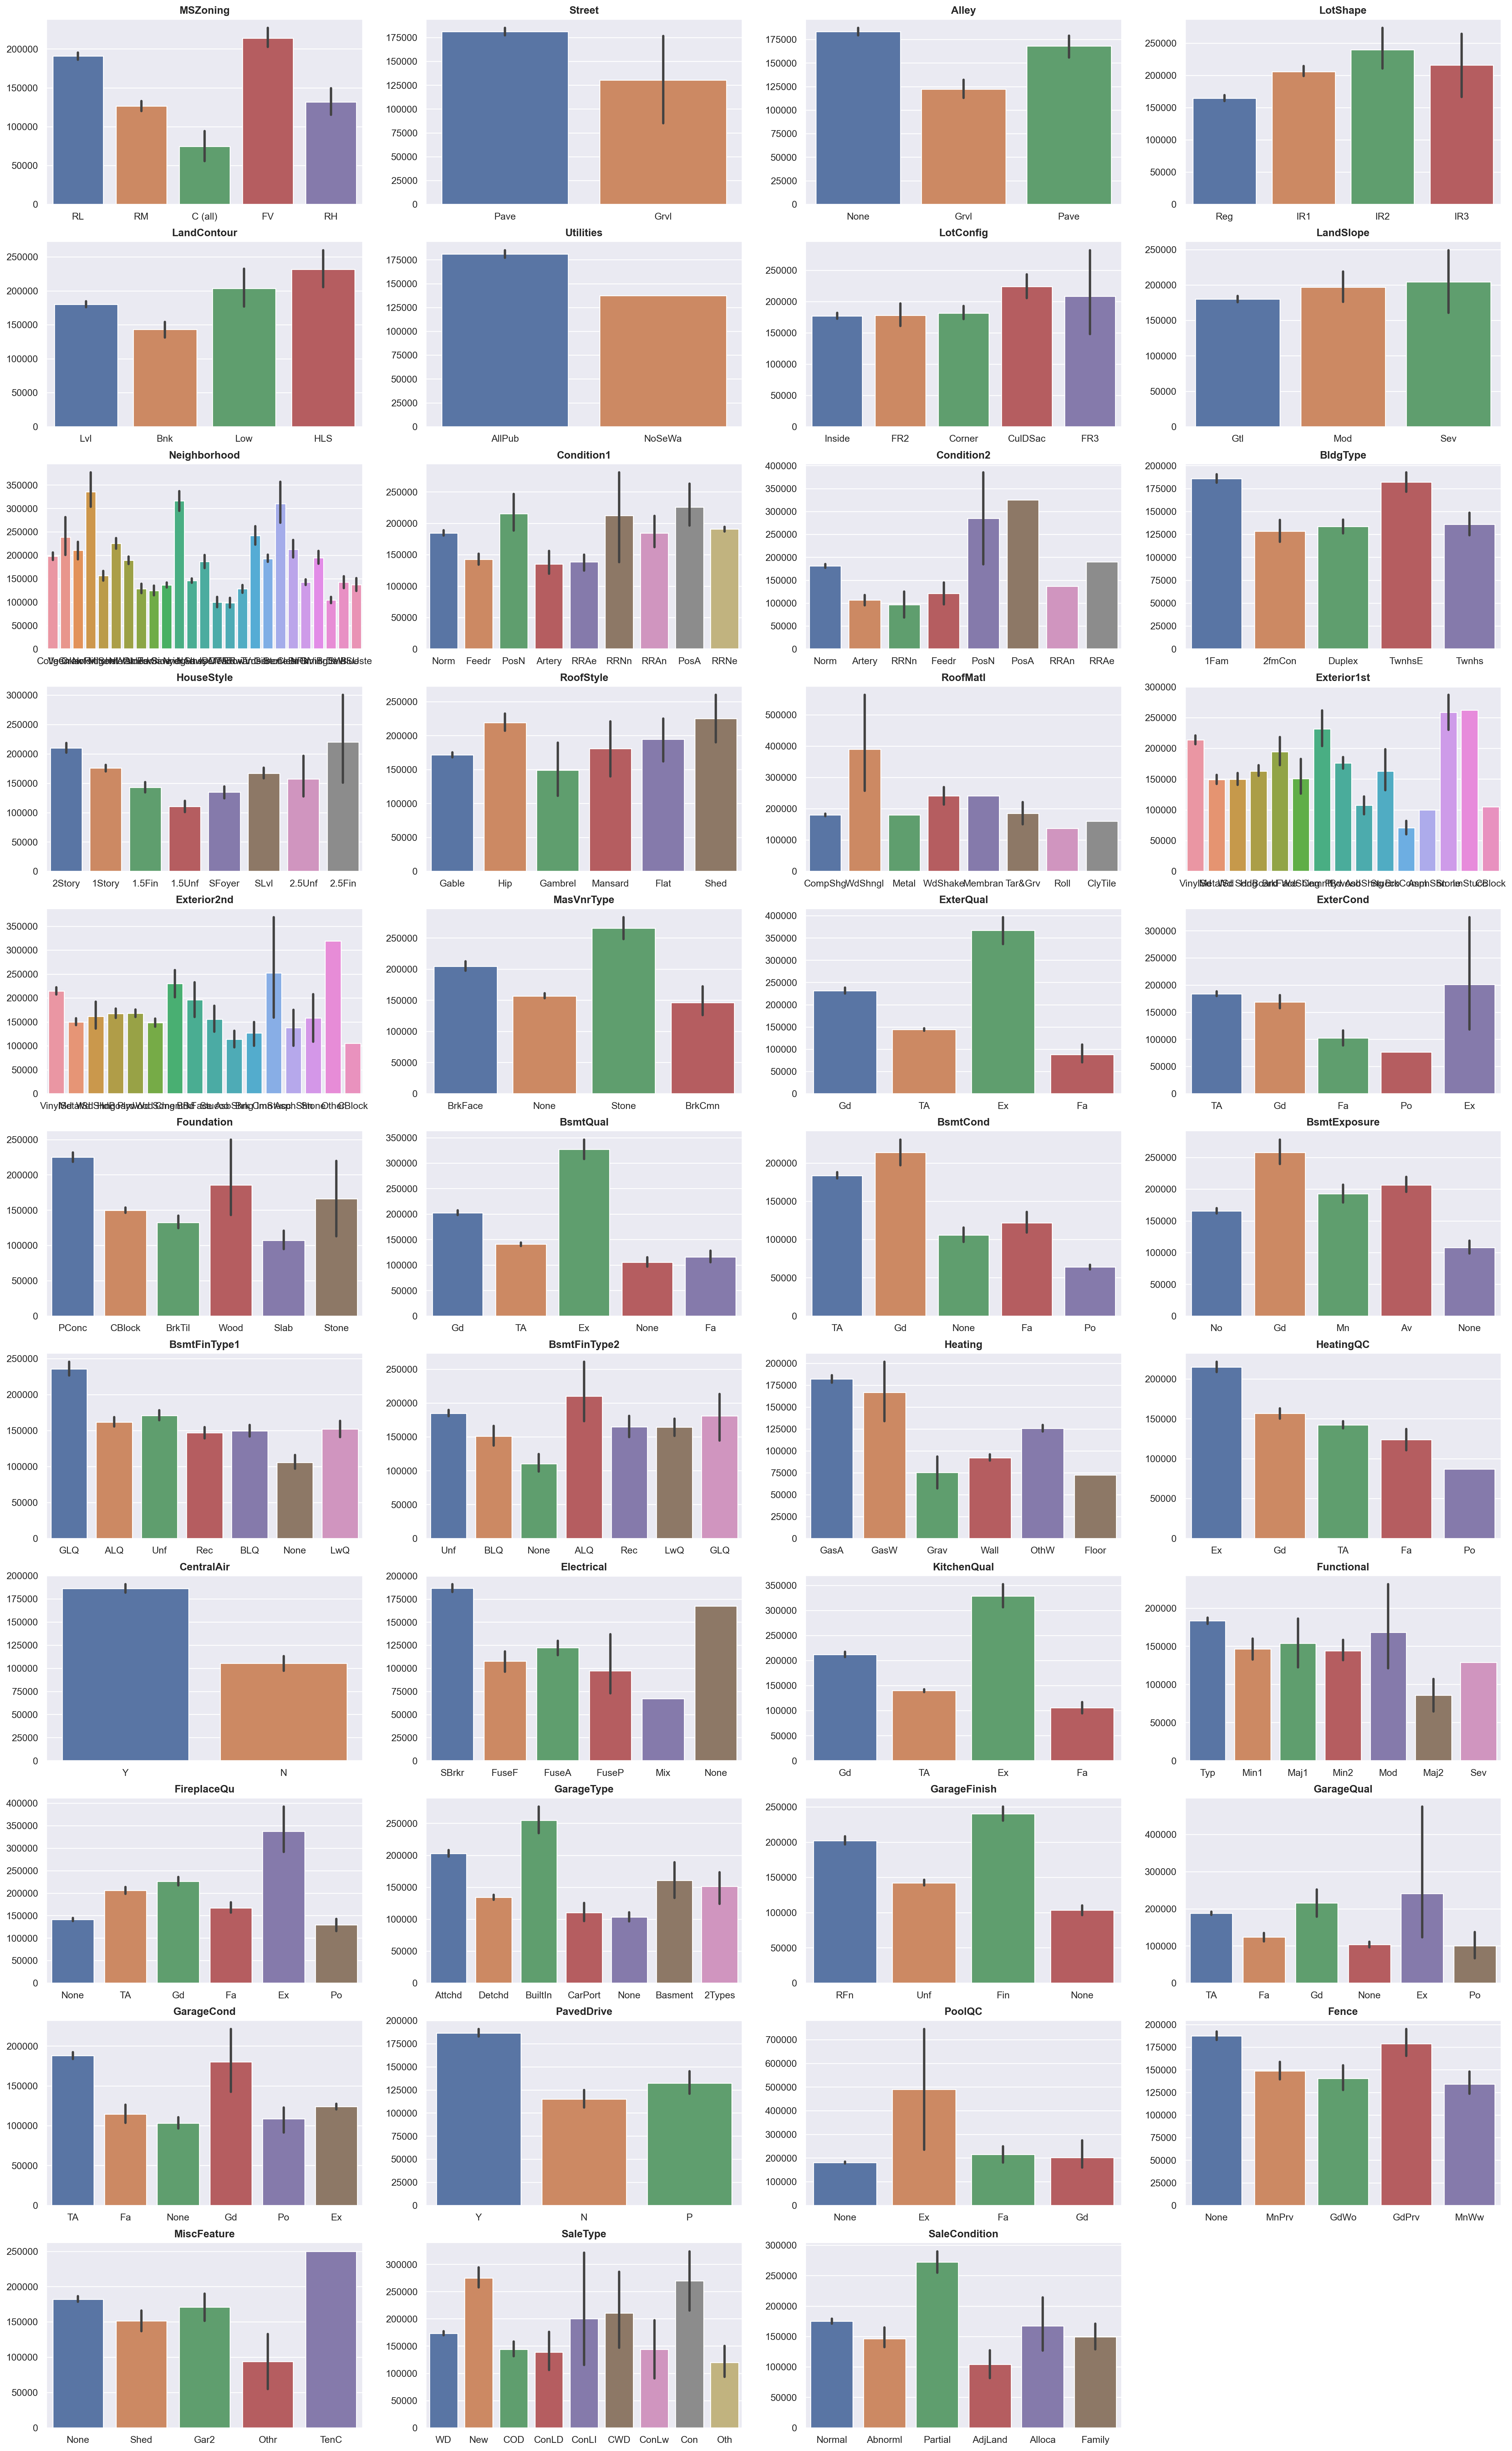

In [37]:
# Categorical column data analysis
plt.figure(figsize=(30, 50))

count = 1

for column in sh_cat_df.columns:
    if column != sale_price_column:
        plt.subplot(11, 4, count)
        sns.barplot(x=h_data[column], y=h_data[sale_price_column]).set(ylabel=None, xlabel=None)
        plt.title(column, weight='bold')
        count += 1
    
plt.show()

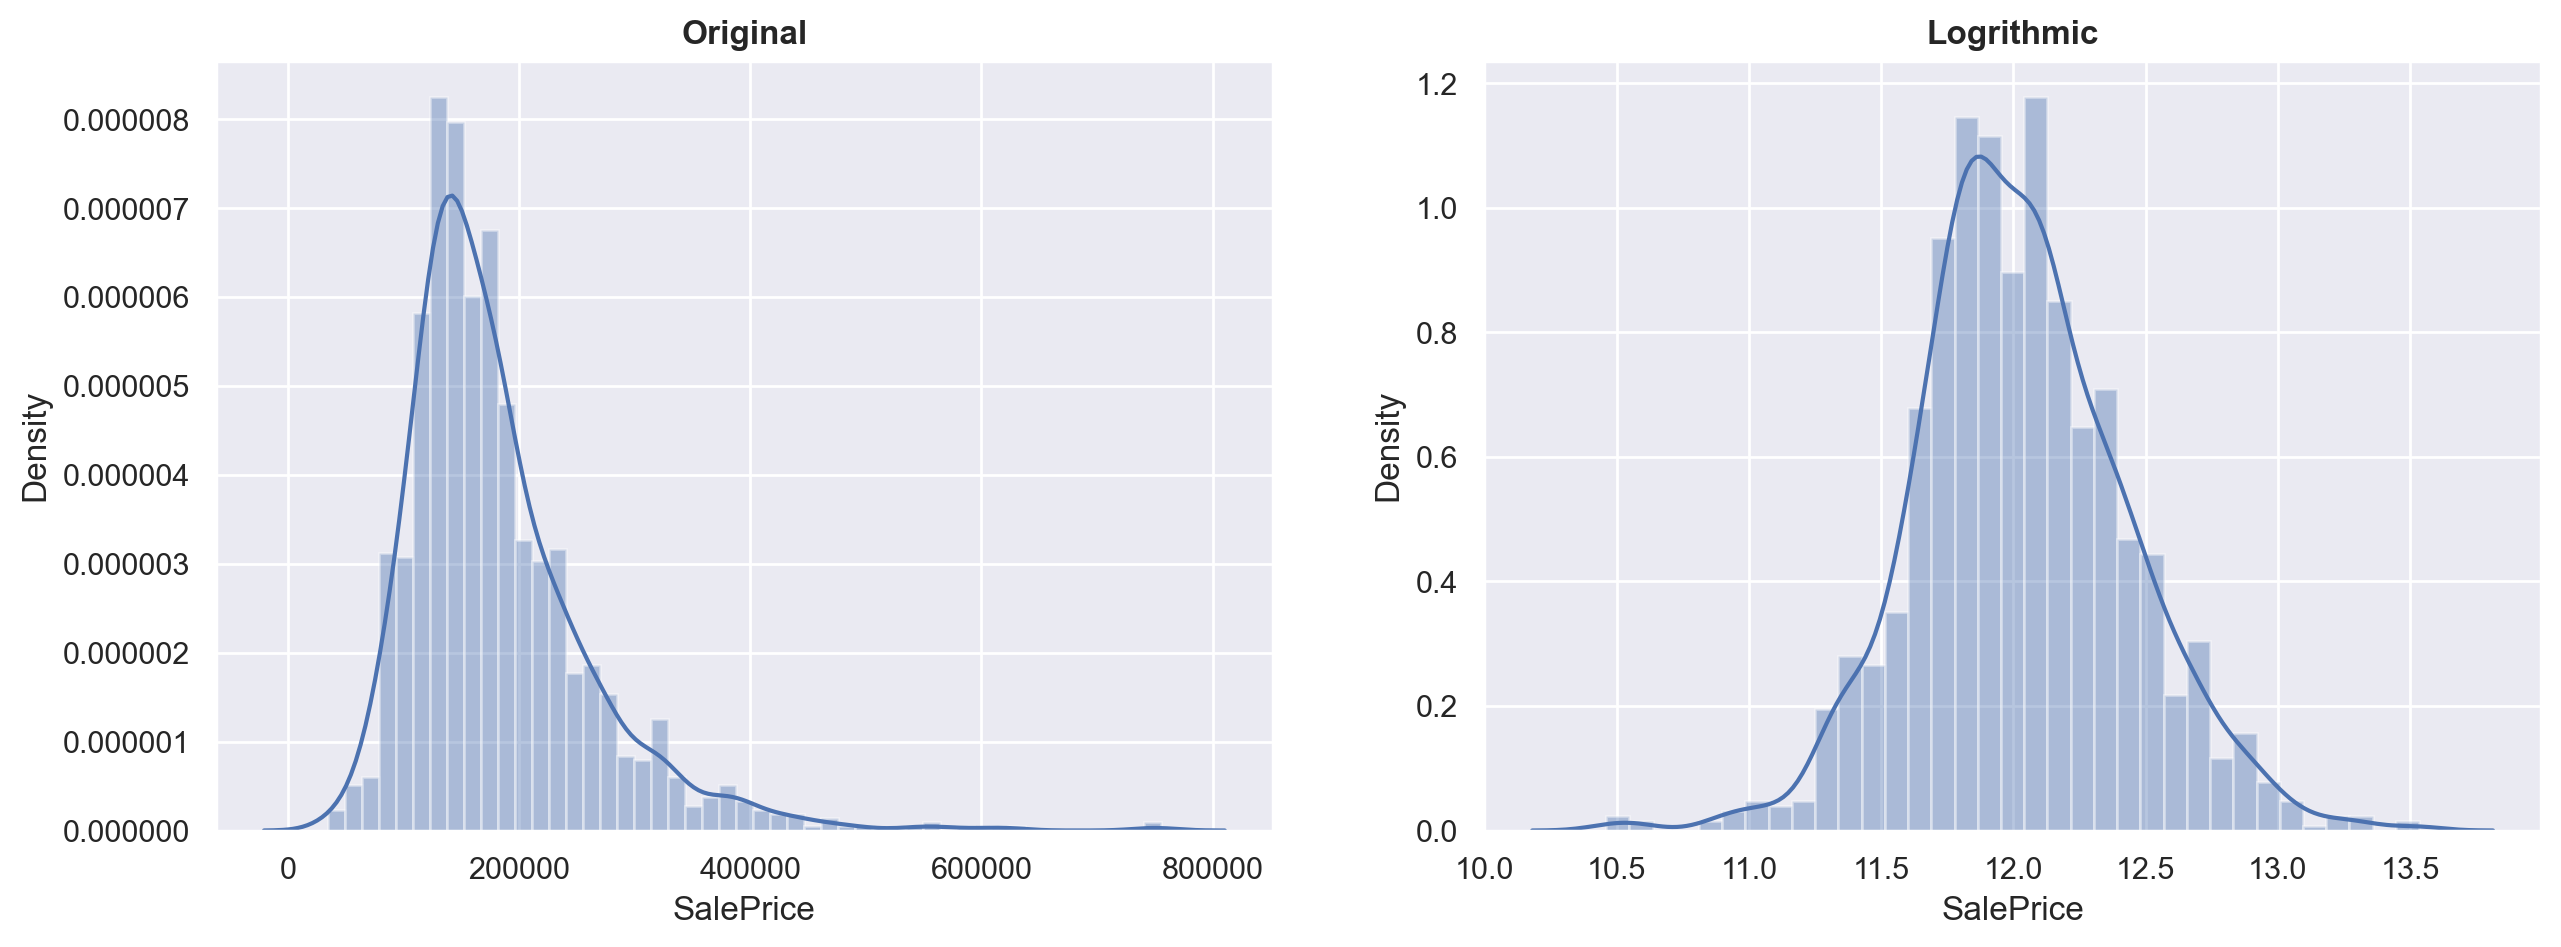

In [38]:
# Target variable data analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(h_data[sale_price_column]).ticklabel_format(useOffset=False, style='plain')
plt.title("Original", weight='bold')

plt.subplot(1, 2, 2)
sns.distplot(np.log(h_data[sale_price_column]))
plt.title("Logrithmic", weight='bold')

plt.show()

In [39]:
qualitative = [f for f in h_data.columns if h_data.dtypes[f] == 'object']

In [40]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')



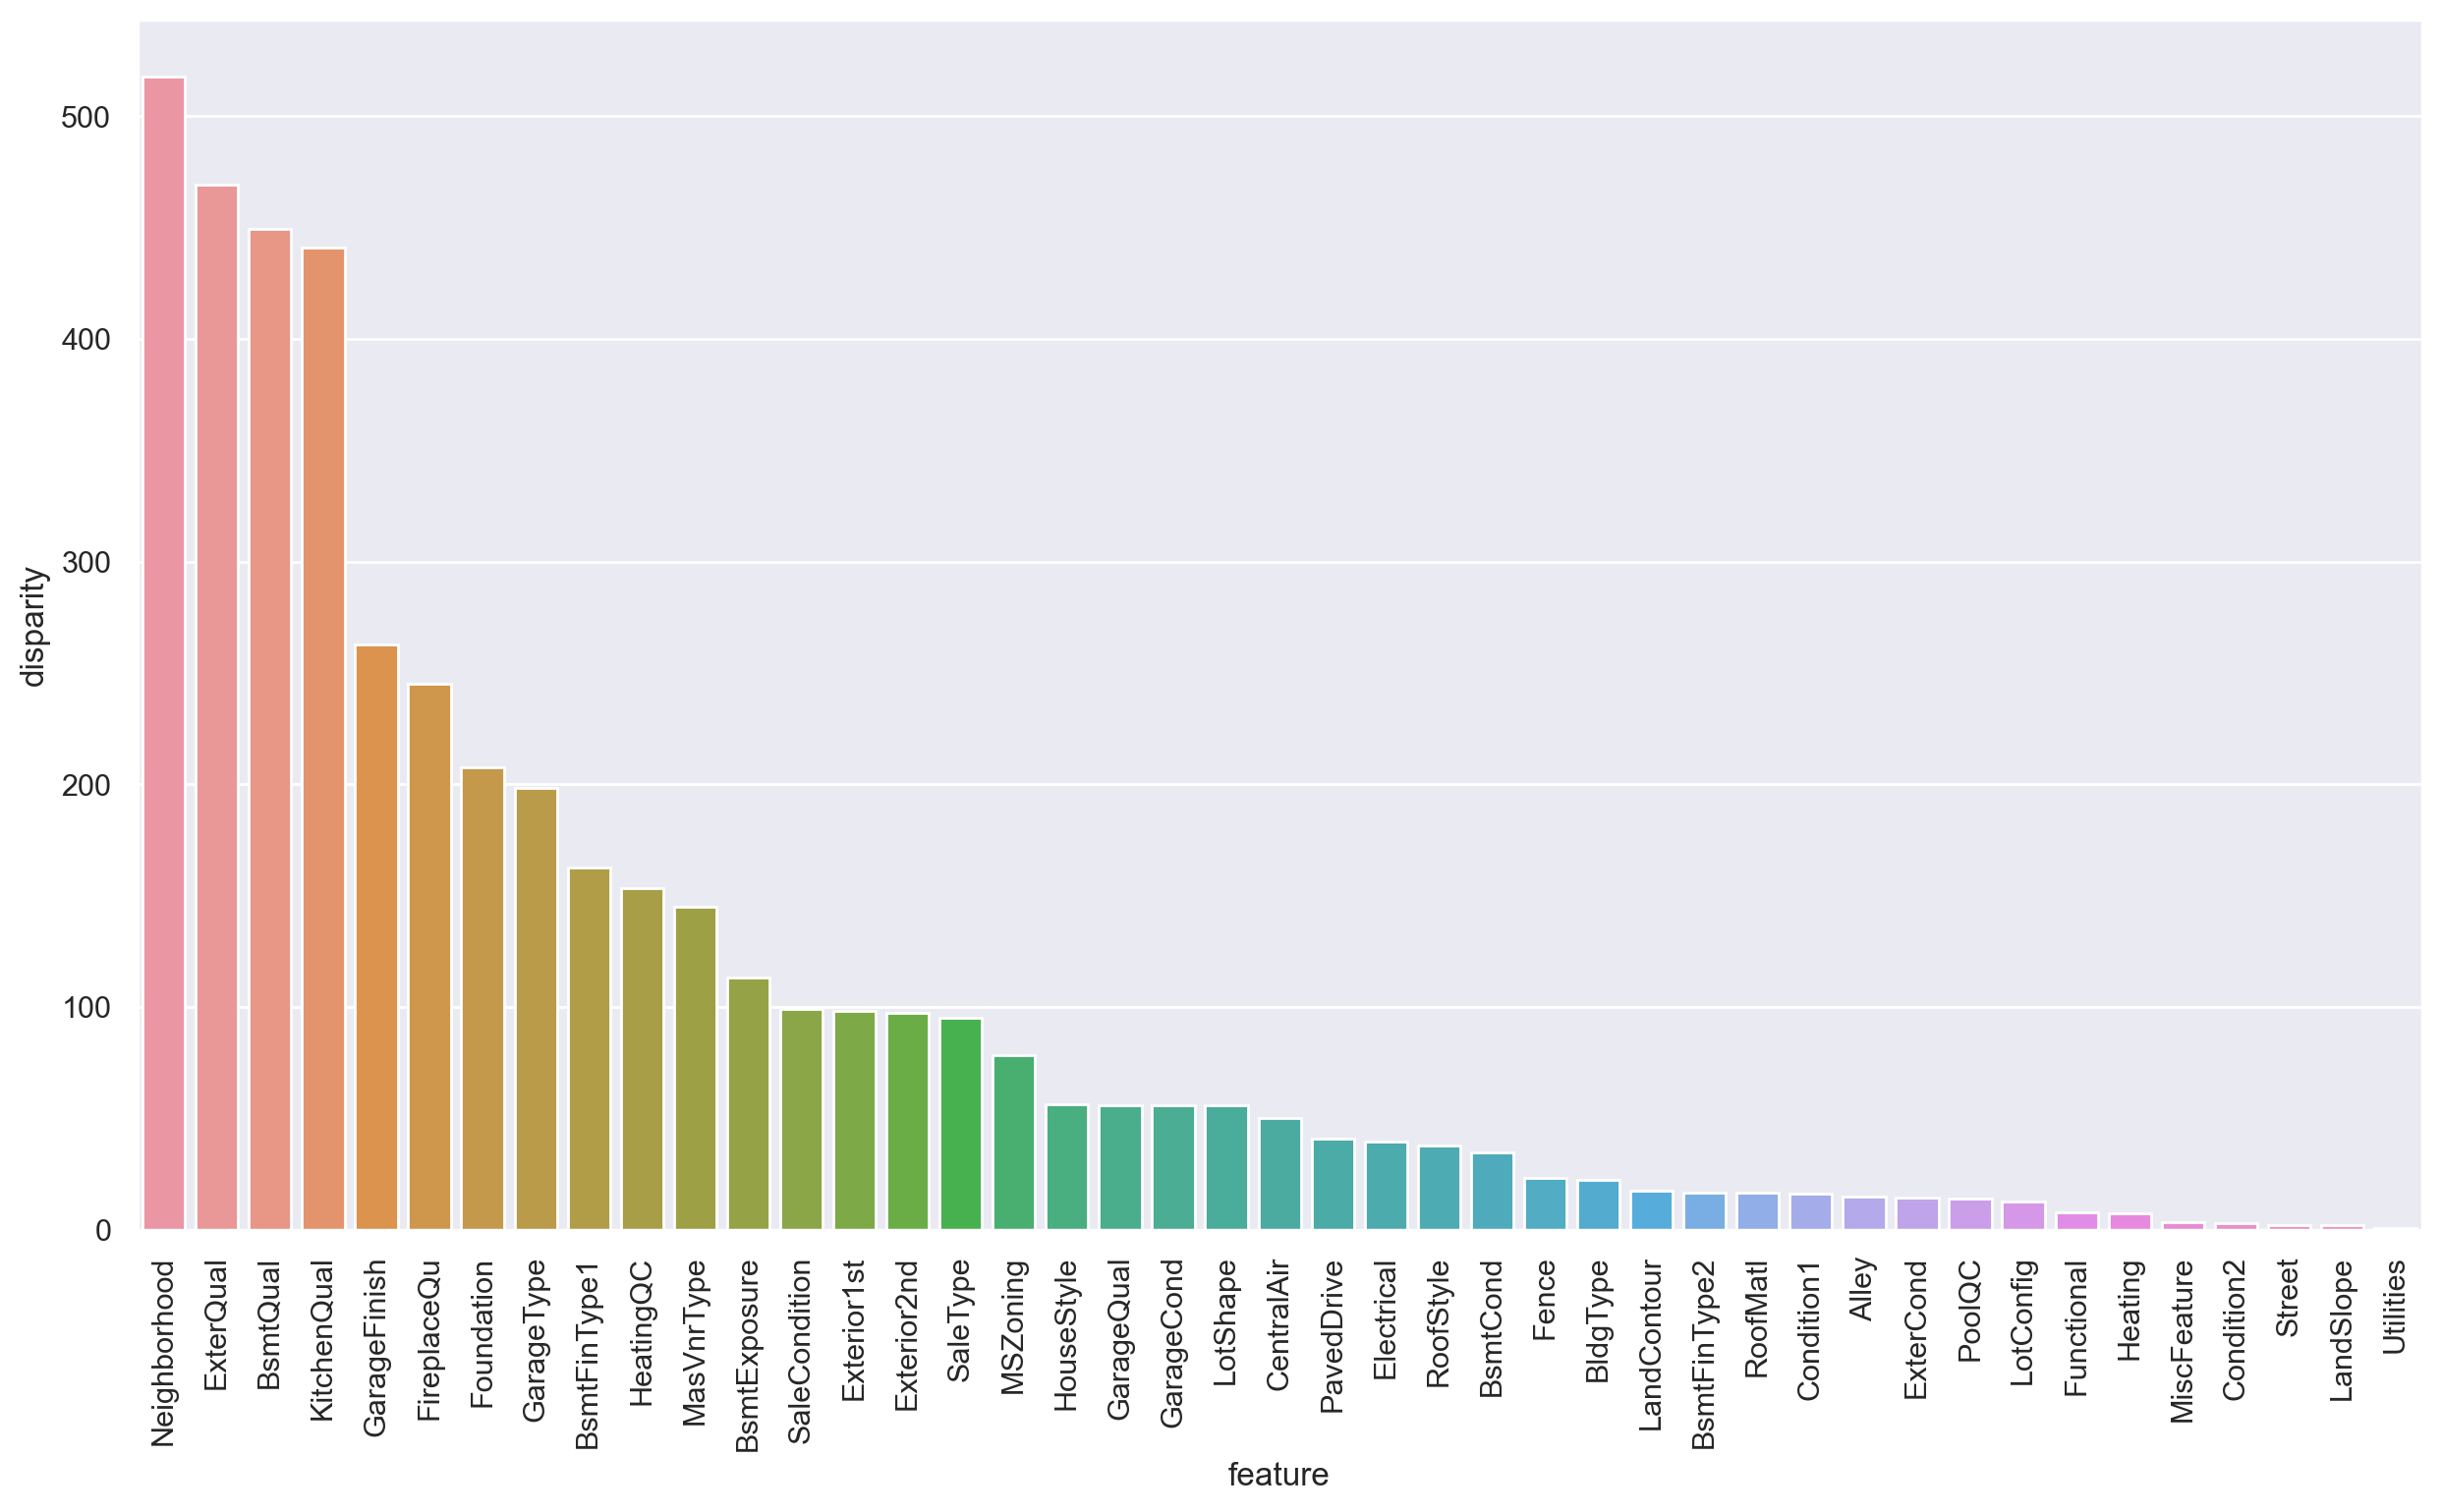

In [41]:
plt.figure(figsize=(15, 8))
a = anova(h_data)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

From the above chart we can see that some of the majorly influencing variables are -

- Neighbourhood
- ExterQuality
- Basement Quality
- KitchenQuality
- Garage Finish
- FireplaceQU
- Foundation
- Garage Finish Type
- Basement Finish Type
- Heating QC
- MasVnrType
- Basement Exposure
- Sale Condition
- Exteriors 1,2



## Data Preperation

<Axes: xlabel='SalePrice', ylabel='Density'>

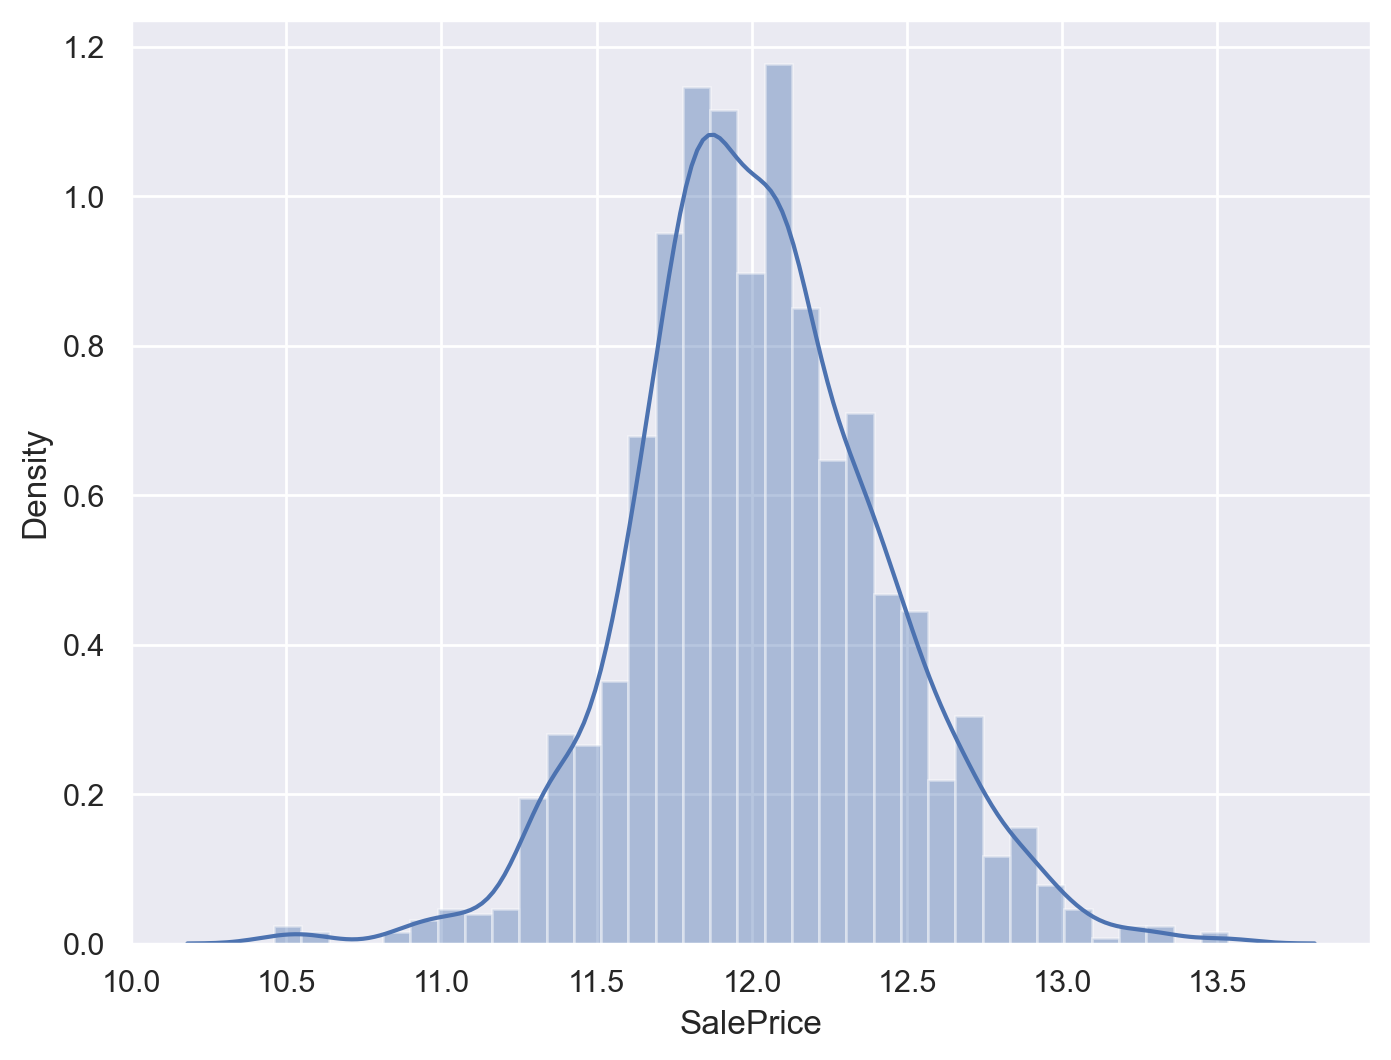

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(np.log(h_data["SalePrice"]))

In [43]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [44]:
#Converting a Binary varible into numeric datatypes
# mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0) 

In [45]:
cat_values = h_data.select_dtypes(include=['object'])
#cat_values.head

In [46]:
fh_data =dcsh_data
## Droping the 'Id' column 
fh_data = fh_data.drop(['Id'],axis=1)

cat_Cols = fh_data.select_dtypes(include=['object'])
feature_names = fh_data.columns

In [47]:
from sklearn.preprocessing import LabelEncoder 

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
for col in cat_Cols:
    # Fit label encoder and transform the column
    fh_data[col] = label_encoder.fit_transform(fh_data[col])

enc_df=fh_data
# Print the encoded DataFrame
enc_df.shape

fh_data =enc_df

In [48]:
fh_data.shape

(1460, 80)

In [49]:
fh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##  Train Test Split

In [50]:
#'SalePrice' is dependent variable so drop it . Copying rest of the columns to X
X = fh_data.drop('SalePrice', axis=1)

#Copying the 'SalePrice' column alone into the y dataframe. This is the dependent variable
y = fh_data[['SalePrice']]

In [51]:
from sklearn import preprocessing

# scale all the columns of the df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [52]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [53]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       '

In [54]:
# 2. Feature Scaling
scaler = StandardScaler()
X_train_LR_scaled = scaler.fit_transform(X_train)
X_test_LR_scaled = scaler.transform(X_test)

In [55]:
X_train.describe()

MSSubClass     MSZoning  LotFrontage      LotArea       Street        Alley     LotShape  LandContour    Utilities    LotConfig    LandSlope  Neighborhood   Condition1   Condition2     BldgType   HouseStyle  OverallQual  OverallCond    YearBuilt  YearRemodAdd    RoofStyle     RoofMatl  Exterior1st  Exterior2nd   MasVnrType   MasVnrArea    ExterQual    ExterCond   Foundation     BsmtQual     BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF      Heating    HeatingQC   CentralAir   Electrical     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   Functional   Fireplaces  FireplaceQu   GarageType  GarageYrBlt  GarageFinish   GarageCars   GarageArea   GarageQual   GarageCond    PavedDrive   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       PoolQC        Fence  MiscFeature      MiscVal  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   1022.000000   1022.000000  1022.000000   1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   1022.000000  1022.000000   1022.000000   1022.000000  1022.000000  1022.000000   1022.000000   1022.000000  1022.000000   1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1.022000e+03  1022.000000  1022.000000    1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean     -0.007381     0.042744    -0.007144     0.014123     0.018354     0.001176    -0.014726     0.000692     0.011220    -0.032333    -0.016654     -0.019352     0.002029     0.009824    -0.008985     0.016285     0.020171     0.044859     0.006880      0.028219    -0.000352     0.008169     0.037222     0.038925     0.003028    -0.016706    -0.000846    -0.015649     0.010433     0.008727    -0.008555     -0.022756     -0.018824     0.016216      0.027795    -0.004972    -0.007713     0.007263     0.012935    -0.025996     0.033720     0.033151     0.021538    -0.006371     -0.006021     0.009995      0.030746     -0.003280    -0.002665    -0.018101      0.029396     -0.020435    -0.008489      0.014935     0.027176     0.009869    -0.021462    -0.034581     0.040876      0.014785     0.002620     0.001141    -0.001307     0.007561  6.952473e-18     0.014065    -0.002937       0.011385     0.002250     0.024361    -0.012512     0.021565     0.010033    -0.001841     0.018929   
std       0.990664     0.931748     1.028713     1.046442     0.846066     0.987069     1.005342     1.013243     1.195638     1.017432     0.945468      1.000653     1.030231     1.073389     0.993208     0.999842     0.980845     1.012587     0.995700      0.995054     1.001294     1.023187     0.987375     0.979415     1.019520     0.957730     0.979988     1.015136     1.023809     0.971596     1.012532      1.014095      0.996118     1.016257      0.958839     1.022519     0.993080     1.022156     1.109306     1.001954     0.938510     0.948820     1.015220     0.996989      0.988441     1.008282      0.998621      0.987442     0.976632     0.982779      0.990174      0.933774     0.988363      1.001882     0.924915     1.010446     1.000435     0.983554     0.915671      0.988106     0.967611     0.976790     1.020373     1.003148  1.000490e+00     0.993283     1.004431       1.030126     1.043410     1.029573     0.909964     0.769636     0.996125     0.992663     1.180904   
min      -0.

## Model Building

#### Linear Regression

In [56]:
## Building a Regression model.
ln_mdl = LinearRegression()
ln_mdl.fit(X_train,y_train)

LinearRegression()

In [57]:
# Calculating the RFE
rfe = RFE(estimator=ln_mdl, n_features_to_select=40) #RFE(reg, 40)
rfe = rfe.fit(X_train, y_train)


In [58]:
#Top 40 features selected by LR
col=X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition2', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'SaleCondition'], dtype='object')

In [59]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train.astype(float),X_train_new.astype(float))

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     128.4
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:19:59   Log-Likelihood:                -507.83
No. Observations:                1022   AIC:                             1094.
Df Residuals:                     983   BIC:                             1286.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0110      0.013     -0.863      0.388      -0.036       0.014
MSSubClass       -0.0898      0.017     -5.364      0.000      -0.123      -0.057
LotArea           0.0423      0.015      2.744      0.006       0.012       0.073
LandContour       0.0437      0.014      3.090      0.002       0.016       0.071
LandSlope         0.0355      0.017      2.031      0.043       0.001       0.070
Neighborhood      0.0274      0.014      2.003      0.045       0.001       0.054
Condition2       -0.0320      0.012     -2.651      0.008      -0.056      -0.008
OverallQual       0.1931      0.024      7.910      0.000       0.145       0.241
OverallCond       0.0687      0.015      4.669      0.000       0.040       0.098
YearBuilt         0.0769      0.022      3.447      0.001       0.033       0.121
RoofMatl          0.0443      0.013      3.304      0.001       0.018       0.071
Exterior1st      -0.0623      0.026     -2.358      0.019      -0.114      -0.010
Exterior2nd       0.0438      0.027      1.619      0.106      -0.009       0.097
MasVnrType        0.0268      0.014      1.878      0.061      -0.001       0.055
MasVnrArea        0.0666      0.017      3.871      0.000       0.033       0.100
ExterQual        -0.1138      0.020     -5.566      0.000      -0.154      -0.074
BsmtQual         -0.0490      0.020     -2.428      0.015      -0.089      -0.009
BsmtExposure     -0.0557      0.015     -3.734      0.000      -0.085      -0.026
BsmtFinSF1        0.0294      0.014      2.156      0.031       0.003       0.056
BsmtFinSF2        0.0143      0.013      1.104      0.270      -0.011       0.040
BsmtUnfSF        -0.0187      0.012     -1.544      0.123      -0.042       0.005
TotalBsmtSF       0.0170      0.017      0.997      0.319      -0.016       0.051
1stFlrSF          0.0801      0.021      3.906      0.000       0.040       0.120
2ndFlrSF          0.0758      0.015      4.939      0.000       0.046       0.106
LowQualFinSF      0.0077      0.014      0.563      0.573      -0.019       0.035
GrLivArea         0.1226      0.018      6.865      0.000       0.088       0.158
BsmtFullBath      0.0377      0.018      2.096      0.036       0.002       0.073
FullBath          0.0387      0.021      1.817      0.070      -0.003       0.081
BedroomAbvGr     -0.0298      0.021     -1.397      0.163      -0.072       0.012
KitchenAbvGr     -0.0492      0.018     -2.788      0.005      -0.084      -0.015
KitchenQual      -0.0884      0.018     -5.035      0.000      -0.123      -0.054
TotRmsAbvGrd      0.0990      0.029      3.437      0.001       0.042       0.156
Functional        0.0515      0.015      3.464      0.001       0.022       0.081
Fireplaces        0.0530      0.016      3.384      0.001       0.022       0.084
FireplaceQu      -0.0368      0.014     -2.669   

In [61]:
# creating a function to create adjusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [62]:
#r2score,RSS and RMSE
y_LRpred_train = rfe.predict(X_train)
y_LRpred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_LRpred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_LRpred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(np.array(y_train) - y_LRpred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(np.array(y_test) - y_LRpred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_LRpred_train)
print(mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_LRpred_test)
print(mse_test_lr)
metric.append(mse_test_lr)

rmse_train_lr =mse_train_lr**0.5
print("RMSE Train : " + str (rmse_train_lr))
metric.append(rmse_train_lr)


rmse_test_lr =mse_test_lr**0.5
print("RMSE Test : " + str (rmse_test_lr))
metric.append(rmse_test_lr)



0.832304929796396
0.8413914631129619
161.6528027481365
78.65186538587642
0.15817299681813748
0.17957046891752607
RMSE Train : 0.3977096891177502
RMSE Test : 0.42375755912729873


### Lasso Regression

In [63]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter=100000, fit_intercept=True)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [64]:
# best alpha parameter

alpha_l = lasso_cv.alpha_
alpha_l

0.018301662744060254

Optimim value of alpha is 0.018

In [65]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.018301662744060254)

In [66]:
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for MSSubClass is -0.06885412102955302:
Lasso model coefficients for MSZoning is -0.0:
Lasso model coefficients for LotFrontage is -0.0:
Lasso model coefficients for LotArea is 0.040662477562333314:
Lasso model coefficients for Street is 0.0:
Lasso model coefficients for Alley is 0.0009972758247706272:
Lasso model coefficients for LotShape is -0.01597763670497494:
Lasso model coefficients for LandContour is 0.02076866756980061:
Lasso model coefficients for Utilities is -0.002127874225556331:
Lasso model coefficients for LotConfig is -0.0:
Lasso model coefficients for LandSlope is 0.016760139423995575:
Lasso model coefficients for Neighborhood is 0.01199107946762291:
Lasso model coefficients for Condition1 is -0.0:
Lasso model coefficients for Condition2 is -0.011339143302945519:
Lasso model coefficients for BldgType is -0.0053446745399745406:
Lasso model coefficients for HouseStyle is -0.0:
Lasso model coefficients for OverallQual is 0.22323874796361268:
Lasso 

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_L_pred_train = lasso.predict(X_train)
y_L_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_L_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_L_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(np.array(y_train) - y_L_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(np.array(y_test) - y_L_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_L_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_L_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr)


rmse_train_lr =mse_train_lr**0.5
print("RMSE Train : " + str (rmse_train_lr))
metric2.append(rmse_train_lr)


rmse_test_lr =mse_test_lr**0.5
print("RMSE Test : " + str (rmse_test_lr))
metric2.append(rmse_test_lr)

0.8247993965906161
0.8481174146330043
1733252.2338445126
363830.41650935274
0.16525235030440807
0.17195560598470203
RMSE Train : 0.40651242330881854
RMSE Test : 0.41467530187449314


In [68]:
# Get non-zero coefficients for Lasso
lasso_non_zero_indices = np.where(lasso_cv.coef_ != 0.0)[0]
lasso_top_features = feature_names[lasso_non_zero_indices]
print("Top features in Lasso regression:", lasso_top_features)

Top features in Lasso regression: Index(['MSSubClass', 'LotArea', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'SaleCondition'], dtype='object')


In [69]:
len(lasso_top_features)

44

In [70]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8247993965906161
0.8481174146330043


In [71]:
y_pred_lasso_train=lasso.predict(X_train)
print('Train R2 Square : ', round(r2_score(y_train, y_pred_lasso_train),2))

y_pred_lasso_test=lasso.predict(X_test)
print('Test R2 Square : ', round(r2_score(y_test, y_pred_lasso_test),2))

Train R2 Square :  0.82
Test R2 Square :  0.85


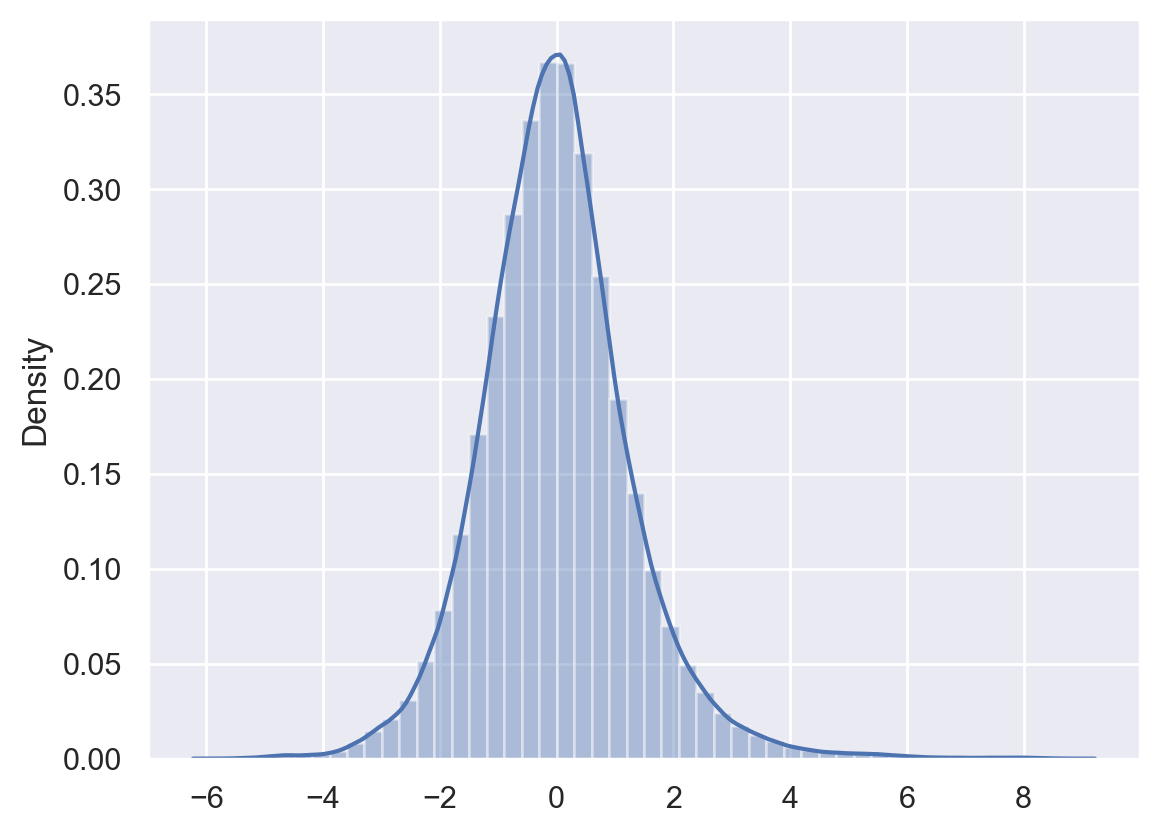

In [72]:
sns.distplot((np.array(y_train)-y_pred_lasso_train))
plt.show()

### Ridge Regression

In [73]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, fit_intercept=True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([7.67124547, 6.25969269, 5.41446541, 1.43508492, 9.50854012,
       7.52729547, 4.23088907, 0.62880705, 2.93725313, 2.40604605,
       9.45654881, 2.82468475, 5.4980981 , 1.37791428, 8.61599848,
       7.13224013, 0.91147767, 9.00090319, 1.85258278, 3.14744063,
       9.76576793, 8.42554398, 0.3636662 , 0.34513024, 6.98933818,
       4.27529979, 2.10126053, 0.53168952, 3.9846697 , 3.31992831,
       7.19156103, 1.21843062, 7.23497597, 7.6892047 , 1.85426365,
       6.24539333, 6.74829934, 8.70186463, 5.95446643, 0.7308596 ,
       8.78173725, 5.82254632, 2.52562563, 0.72934072, 9.98384978,
       2.7979091 , 4.72958993, 7.86410688, 4.79762422, 8.99913   ]),
        cv=10)

In [74]:
# best alpha parameter

alpha_r = ridge_cv.alpha_
alpha_r

9.983849775160877

In [75]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=9.983849775160877)

In [76]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8387614274901314
0.8373014919006796


In [77]:
print(adj_r2(X_train, y_train, ridge))

0.8252392966745479


In [78]:
print(adj_r2(X_test, y_test, ridge))

0.8013987484932876


In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_R_pred_train = ridge.predict(X_train)
y_R_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_R_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_R_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(np.array(y_train) - y_R_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(np.array(y_test) - y_R_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_R_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_R_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr)

rmse_train_lr =mse_train_lr**0.5
print("RMSE Train : " + str (rmse_train_lr))
metric3.append(rmse_train_lr)


rmse_test_lr =mse_test_lr**0.5
print("RMSE Test : " + str (rmse_test_lr))
metric3.append(rmse_test_lr)

0.8387614274901314
0.8373014919006796
155.4289409085369
80.68002775048888
0.1520831124349676
0.18420097659928966
RMSE Train : 0.38997834867459963
RMSE Test : 0.42918641241224037


## Model Evaluation

In [80]:
ridge_pred = ridge.predict(X_test)

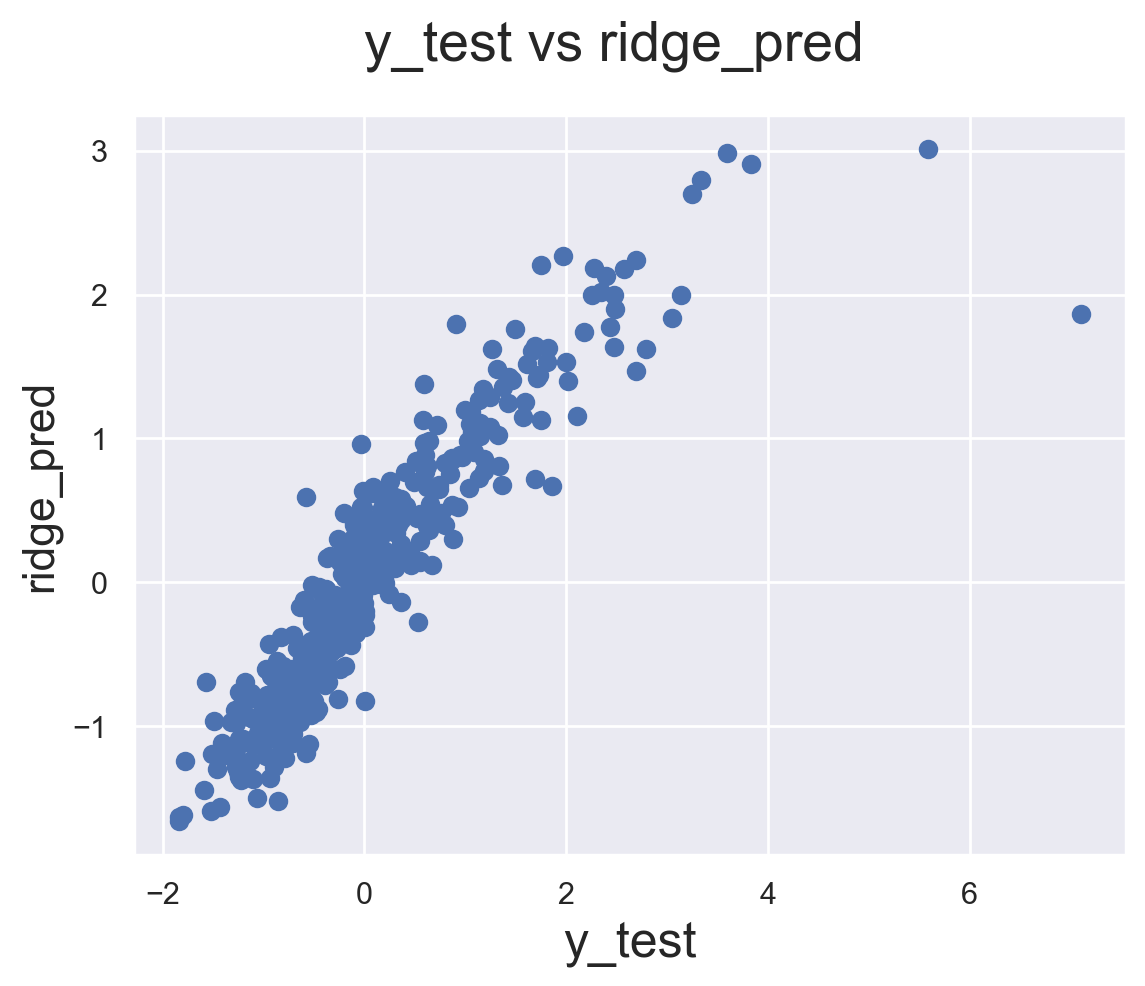

In [81]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

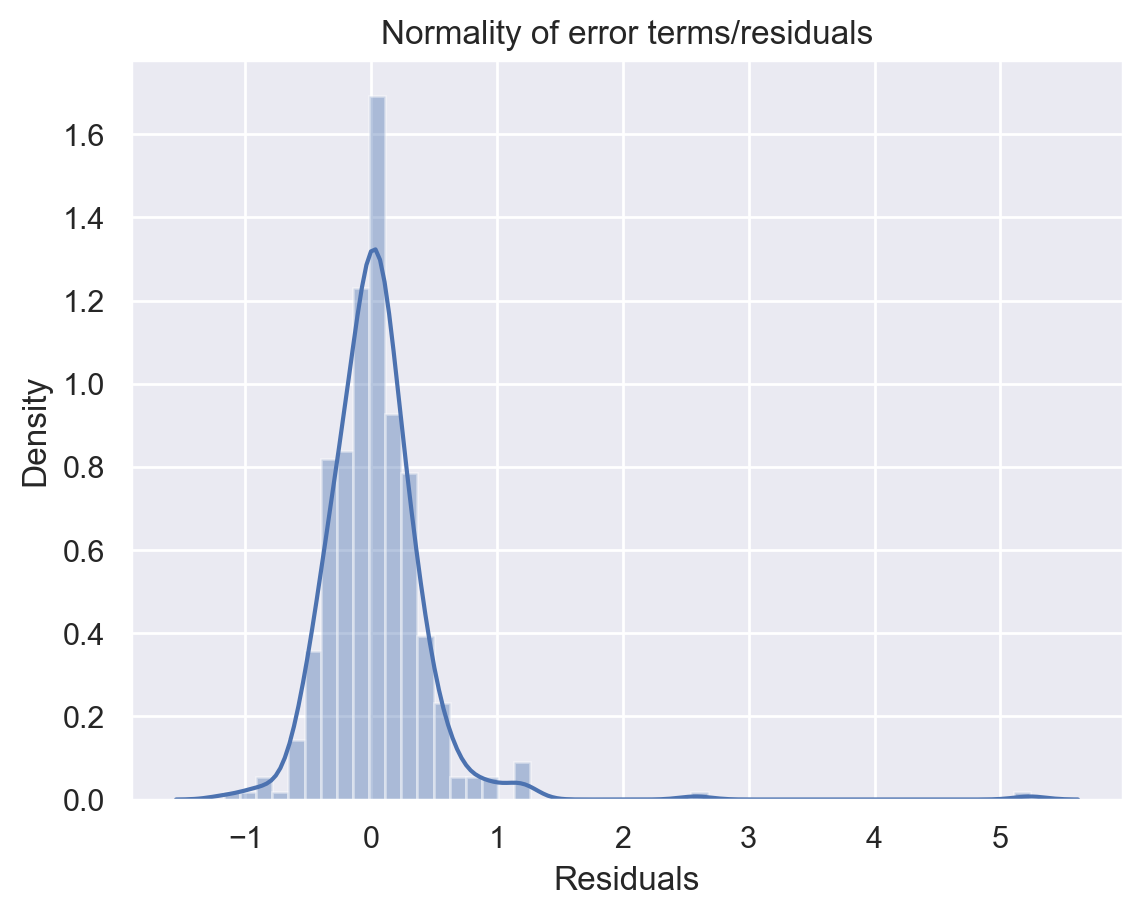

In [82]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [83]:
lasso_pred = lasso.predict(X_test)


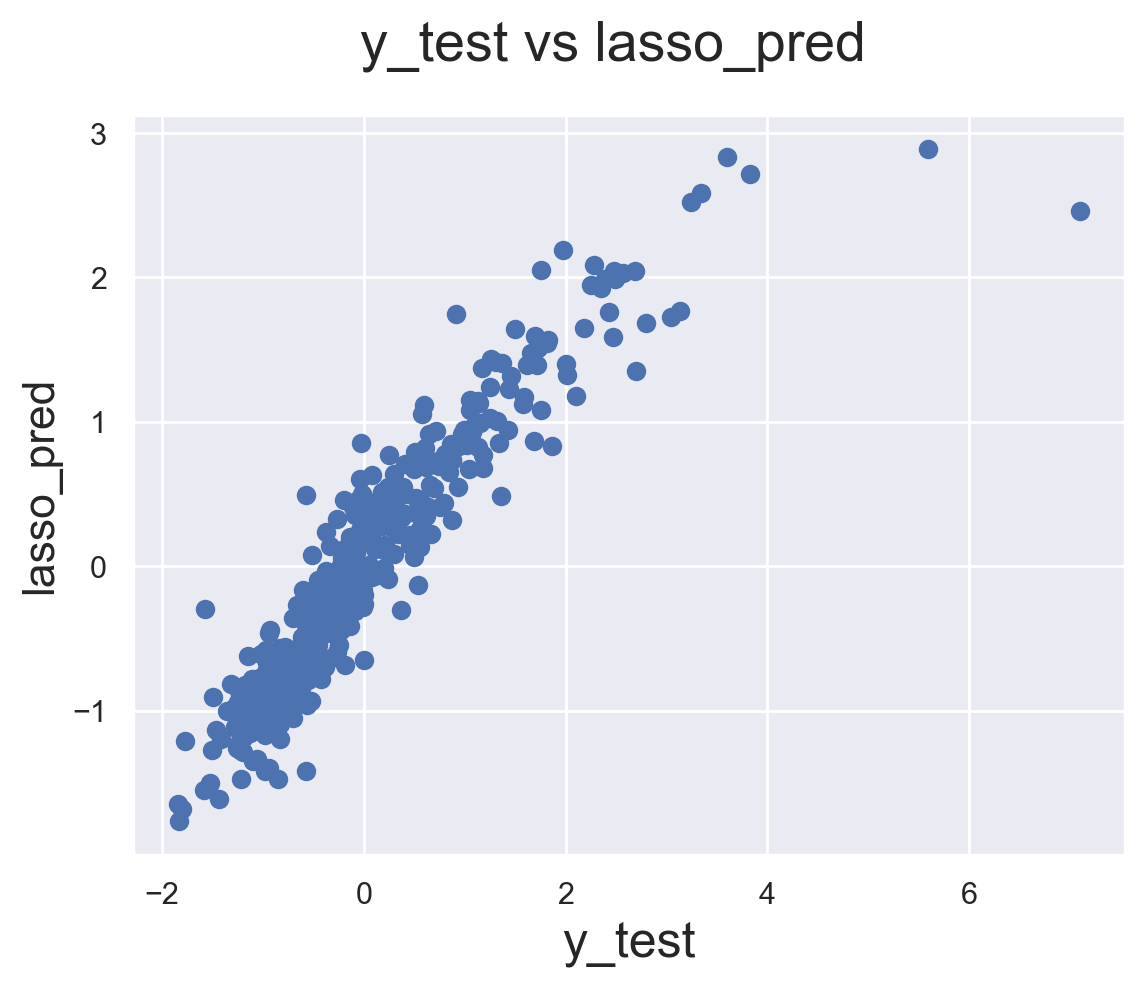

In [84]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

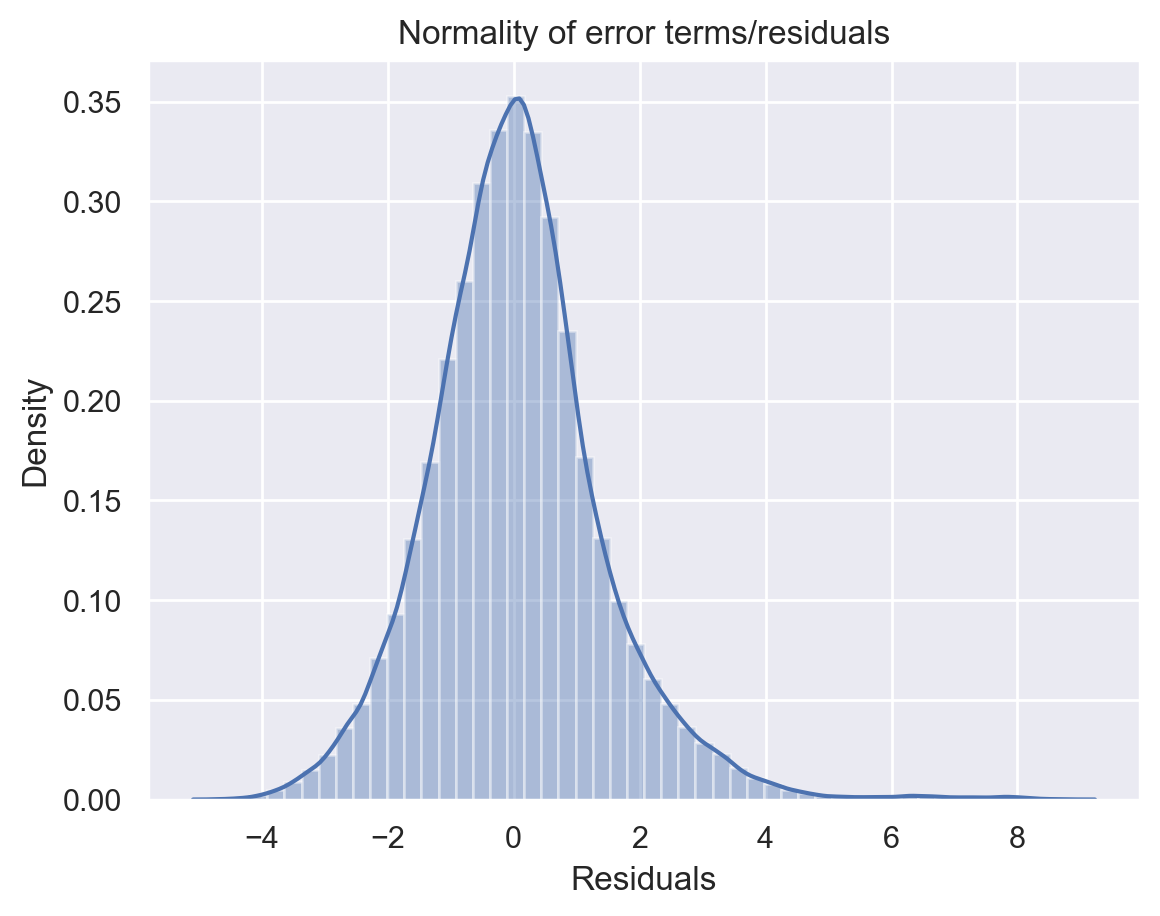

In [85]:
y_res=np.array(y_test)-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [86]:
# Predictions using Standard Scaler and GridSearch CV
y_pred_lasso = lasso.predict(X_test_LR_scaled)
y_pred_ridge = ridge.predict(X_test_LR_scaled)

In [87]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [88]:
print("Lasso MSE:", mse_lasso)
print("Ridge MSE:", mse_ridge)

Lasso MSE: 0.1738186483316368
Ridge MSE: 0.1879435838869307


In [89]:
# Grid search for Lasso
param_grid_lasso = {'alpha': [0.01, 1.0, 10.0]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train_LR_scaled, y_train)

best_lasso_model = grid_search_lasso.best_estimator_
print("Best Lasso Model:", best_lasso_model)



Best Lasso Model: Lasso(alpha=0.01)


In [90]:
# Grid search for Ridge
param_grid_ridge = {'alpha': [0.01, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train_LR_scaled, y_train)

best_ridge_model = grid_search_ridge.best_estimator_
print("Best Ridge Model:", best_ridge_model)

Best Ridge Model: Ridge(alpha=10.0)


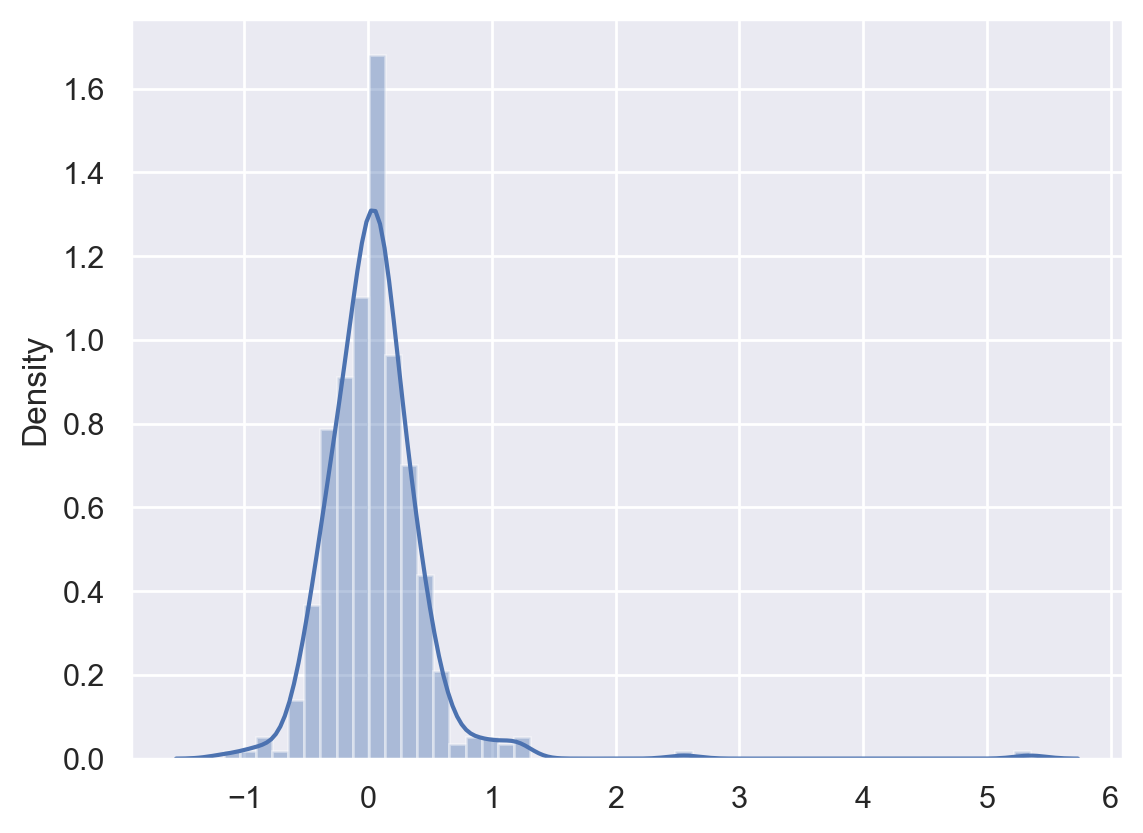

In [91]:
sns.distplot((y_test-y_pred_ridge))
plt.show()

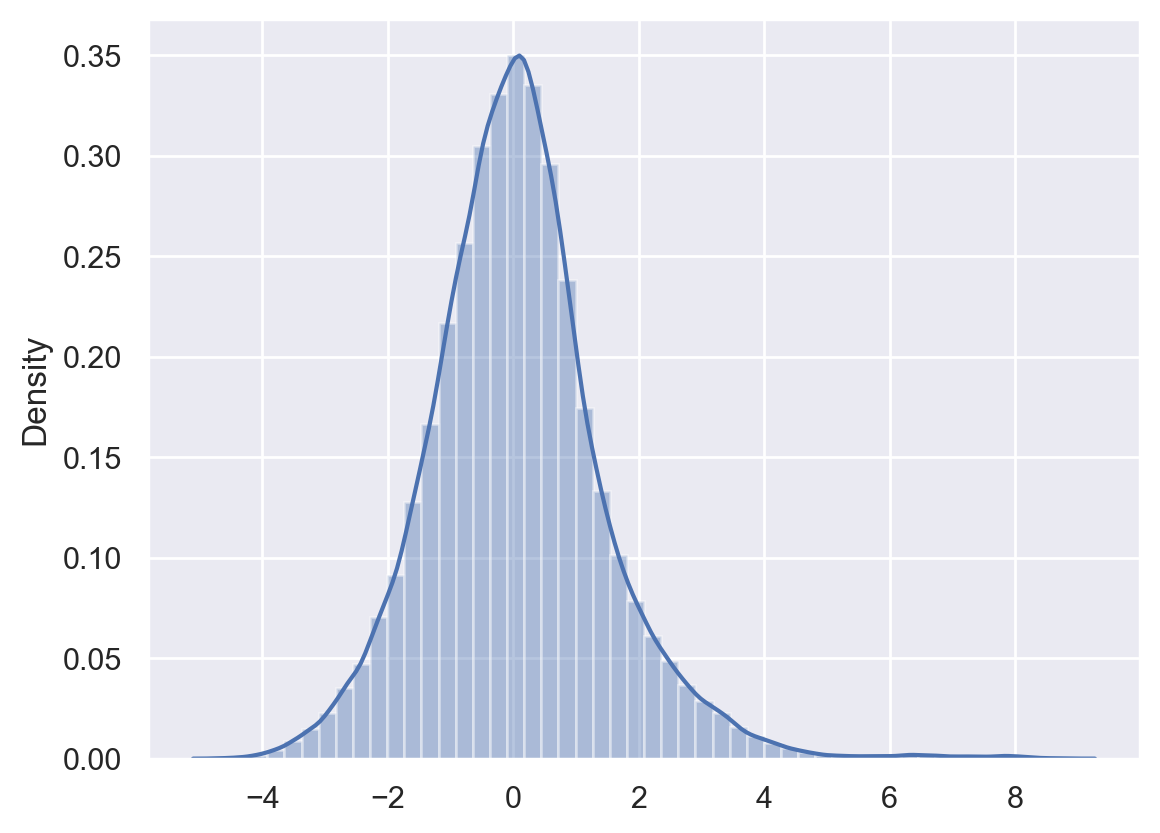

In [92]:
sns.distplot((np.array(y_test)-y_pred_lasso))
plt.show()

### Changes seen in the Co-efficients

In [93]:
betas = pd.DataFrame(index=X_train.columns)

In [94]:
betas.rows = X_train.columns

In [95]:
# Numpy array to assign
ridge_coef_ = np.array(ridge.coef_)
lasso_coef_ = np.array(lasso.coef_)

ridge_coef_ = ridge_coef_.reshape(-1)
lasso_coef_ = lasso_coef_.reshape(-1)

In [96]:
betas['Ridge'] = ridge_coef_
betas['Lasso'] = lasso_coef_

In [97]:
pd.set_option('display.max_rows', None)
betas.head(79)

Ridge     Lasso
MSSubClass    -0.060456 -0.068854
MSZoning       0.000921 -0.000000
LotFrontage   -0.019935 -0.000000
LotArea        0.045859  0.040662
Street         0.015832  0.000000
Alley          0.024997  0.000997
LotShape      -0.015605 -0.015978
LandContour    0.042573  0.020769
Utilities     -0.022827 -0.002128
LotConfig      0.004812 -0.000000
LandSlope      0.032060  0.016760
Neighborhood   0.025279  0.011991
Condition1    -0.016341 -0.000000
Condition2    -0.035617 -0.011339
BldgType      -0.036612 -0.005345
HouseStyle    -0.023388 -0.000000
OverallQual    0.190274  0.223239
OverallCond    0.062231  0.034853
YearBuilt      0.055736  0.037525
YearRemodAdd   0.011311  0.014189
RoofStyle      0.025117  0.010037
RoofMatl       0.046308  0.033268
Exterior1st   -0.065905 -0.001787
Exterior2nd    0.043045 -0.000000
MasVnrType     0.029146  0.008748
MasVnrArea     0.067346  0.050867
ExterQual     -0.113065 -0.112768
ExterCond      0.008170  0.000000
Foundation     0.012608  0.000000
BsmtQual      -0.056080 -0.056108
BsmtCond       0.019005  0.000517
BsmtExposure  -0.055317 -0.050797
BsmtFinType1  -0.024157 -0.021584
BsmtFinSF1     0.013082  0.032904
BsmtFinType2   0.010378 -0.000000
BsmtFinSF2     0.021313  0.000000
BsmtUnfSF     -0.014947 -0.000000
TotalBsmtSF    0.006383  0.009376
Heating       -0.015623 -0.000000
HeatingQC     -0.007582 -0.001971
CentralAir    -0.010656  0.000000
Electrical    -0.018557 -0.000000
1stFlrSF       0.076315  0.018447
2ndFlrSF       0.064837  0.000000
LowQualFinSF   0.002650 -0.000000
GrLivArea      0.110251  0.208957
BsmtFullBath   0.046016  0.026613
BsmtHalfBath   0.021342  0.000000
FullBath       0.049186  0.020070
HalfBath       0.012963  0.000000
BedroomAbvGr  -0.025864 -0.000000
KitchenAbvGr  -0.046184 -0.017746
KitchenQual   -0.089565 -0.093113
TotRmsAbvGrd   0.104441  0.052717
Functional     0.049851  0.029086
Fireplaces     0.050182  0.047946
FireplaceQu   -0.036327 -0.018211
GarageType    -0.000099 -0.000000
GarageYrBlt   -0.048669 -0.000000
GarageFinish  -0.001165 -0.006032
GarageCars     0.139513  0.114760
GarageArea     0.004764  0.000000
GarageQual    -0.015366 -0.000000
GarageCond     0.011678  0.000000
PavedDrive     0.017580  0.004974
WoodDeckSF     0.045717  0.034637
OpenPorchSF   -0.003757  0.000000
EnclosedPorch  0.016879  0.000000
3SsnPorch      0.005745  0.000000
ScreenPorch    0.039486  0.026601
PoolArea      -0.057208 -0.041733
PoolQC         0.005404  0.000000
Fence         -0.000445  0.000000
MiscFeature   -0.009639 -0.000000
MiscVal        0.002573 -0.000000
MoSold        -0.009879 -0.000000
YrSold        -0.021343 -0.000000
SaleType      -0.016515 -0.000000
SaleCondition  0.047024  0.030414

In [98]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
ls_metric = pd.Series(metric2, name = 'Lasso Regression')
rg_metric = pd.Series(metric3, name = 'Ridge Regression')

final_metric = pd.concat([lr_metric, ls_metric, rg_metric], axis = 1)

final_metric

Metric  Linear Regression  Lasso Regression  Ridge Regression
0  R2 Score (Train)           0.832305      8.247994e-01          0.838761
1   R2 Score (Test)           0.841391      8.481174e-01          0.837301
2       RSS (Train)         161.652803      1.733252e+06        155.428941
3        RSS (Test)          78.651865      3.638304e+05         80.680028
4       MSE (Train)           0.158173      1.652524e-01          0.152083
5        MSE (Test)           0.179570      1.719556e-01          0.184201
6      RMSE (Train)           0.397710      4.065124e-01          0.389978
7       RMSE (Test)           0.423758      4.146753e-01          0.429186

### Identifying Top features in Lasso and Ridge

In [99]:
# Get absolute coefficients for Lasso
lasso_coefficients = np.abs(lasso_coef_)

# Get absolute coefficients for Ridge
ridge_coefficients = np.abs(ridge_coef_)


In [100]:

lasso_coef_df = pd.DataFrame(betas['Lasso'])
lasso_coef_df = lasso_coef_df.abs()

# Sort the DataFrame by coefficient values to display top features
lasso_top_features = lasso_coef_df.sort_values(by='Lasso', ascending=False) 

# Print top features and their coefficients
print("Top Features selected by Lasso along with their Coefficients:")
print(lasso_top_features)

Top Features selected by Lasso along with their Coefficients:
                  Lasso
OverallQual    0.223239
GrLivArea      0.208957
GarageCars     0.114760
ExterQual      0.112768
KitchenQual    0.093113
MSSubClass     0.068854
BsmtQual       0.056108
TotRmsAbvGrd   0.052717
MasVnrArea     0.050867
BsmtExposure   0.050797
Fireplaces     0.047946
PoolArea       0.041733
LotArea        0.040662
YearBuilt      0.037525
OverallCond    0.034853
WoodDeckSF     0.034637
RoofMatl       0.033268
BsmtFinSF1     0.032904
SaleCondition  0.030414
Functional     0.029086
BsmtFullBath   0.026613
ScreenPorch    0.026601
BsmtFinType1   0.021584
LandContour    0.020769
FullBath       0.020070
1stFlrSF       0.018447
FireplaceQu    0.018211
KitchenAbvGr   0.017746
LandSlope      0.016760
LotShape       0.015978
YearRemodAdd   0.014189
Neighborhood   0.011991
Condition2     0.011339
RoofStyle      0.010037
TotalBsmtSF    0.009376
MasVnrType     0.008748
GarageFinish   0.006032
BldgType       0.005345
Pa

<Axes: title={'center': 'Modal Coefficients'}>

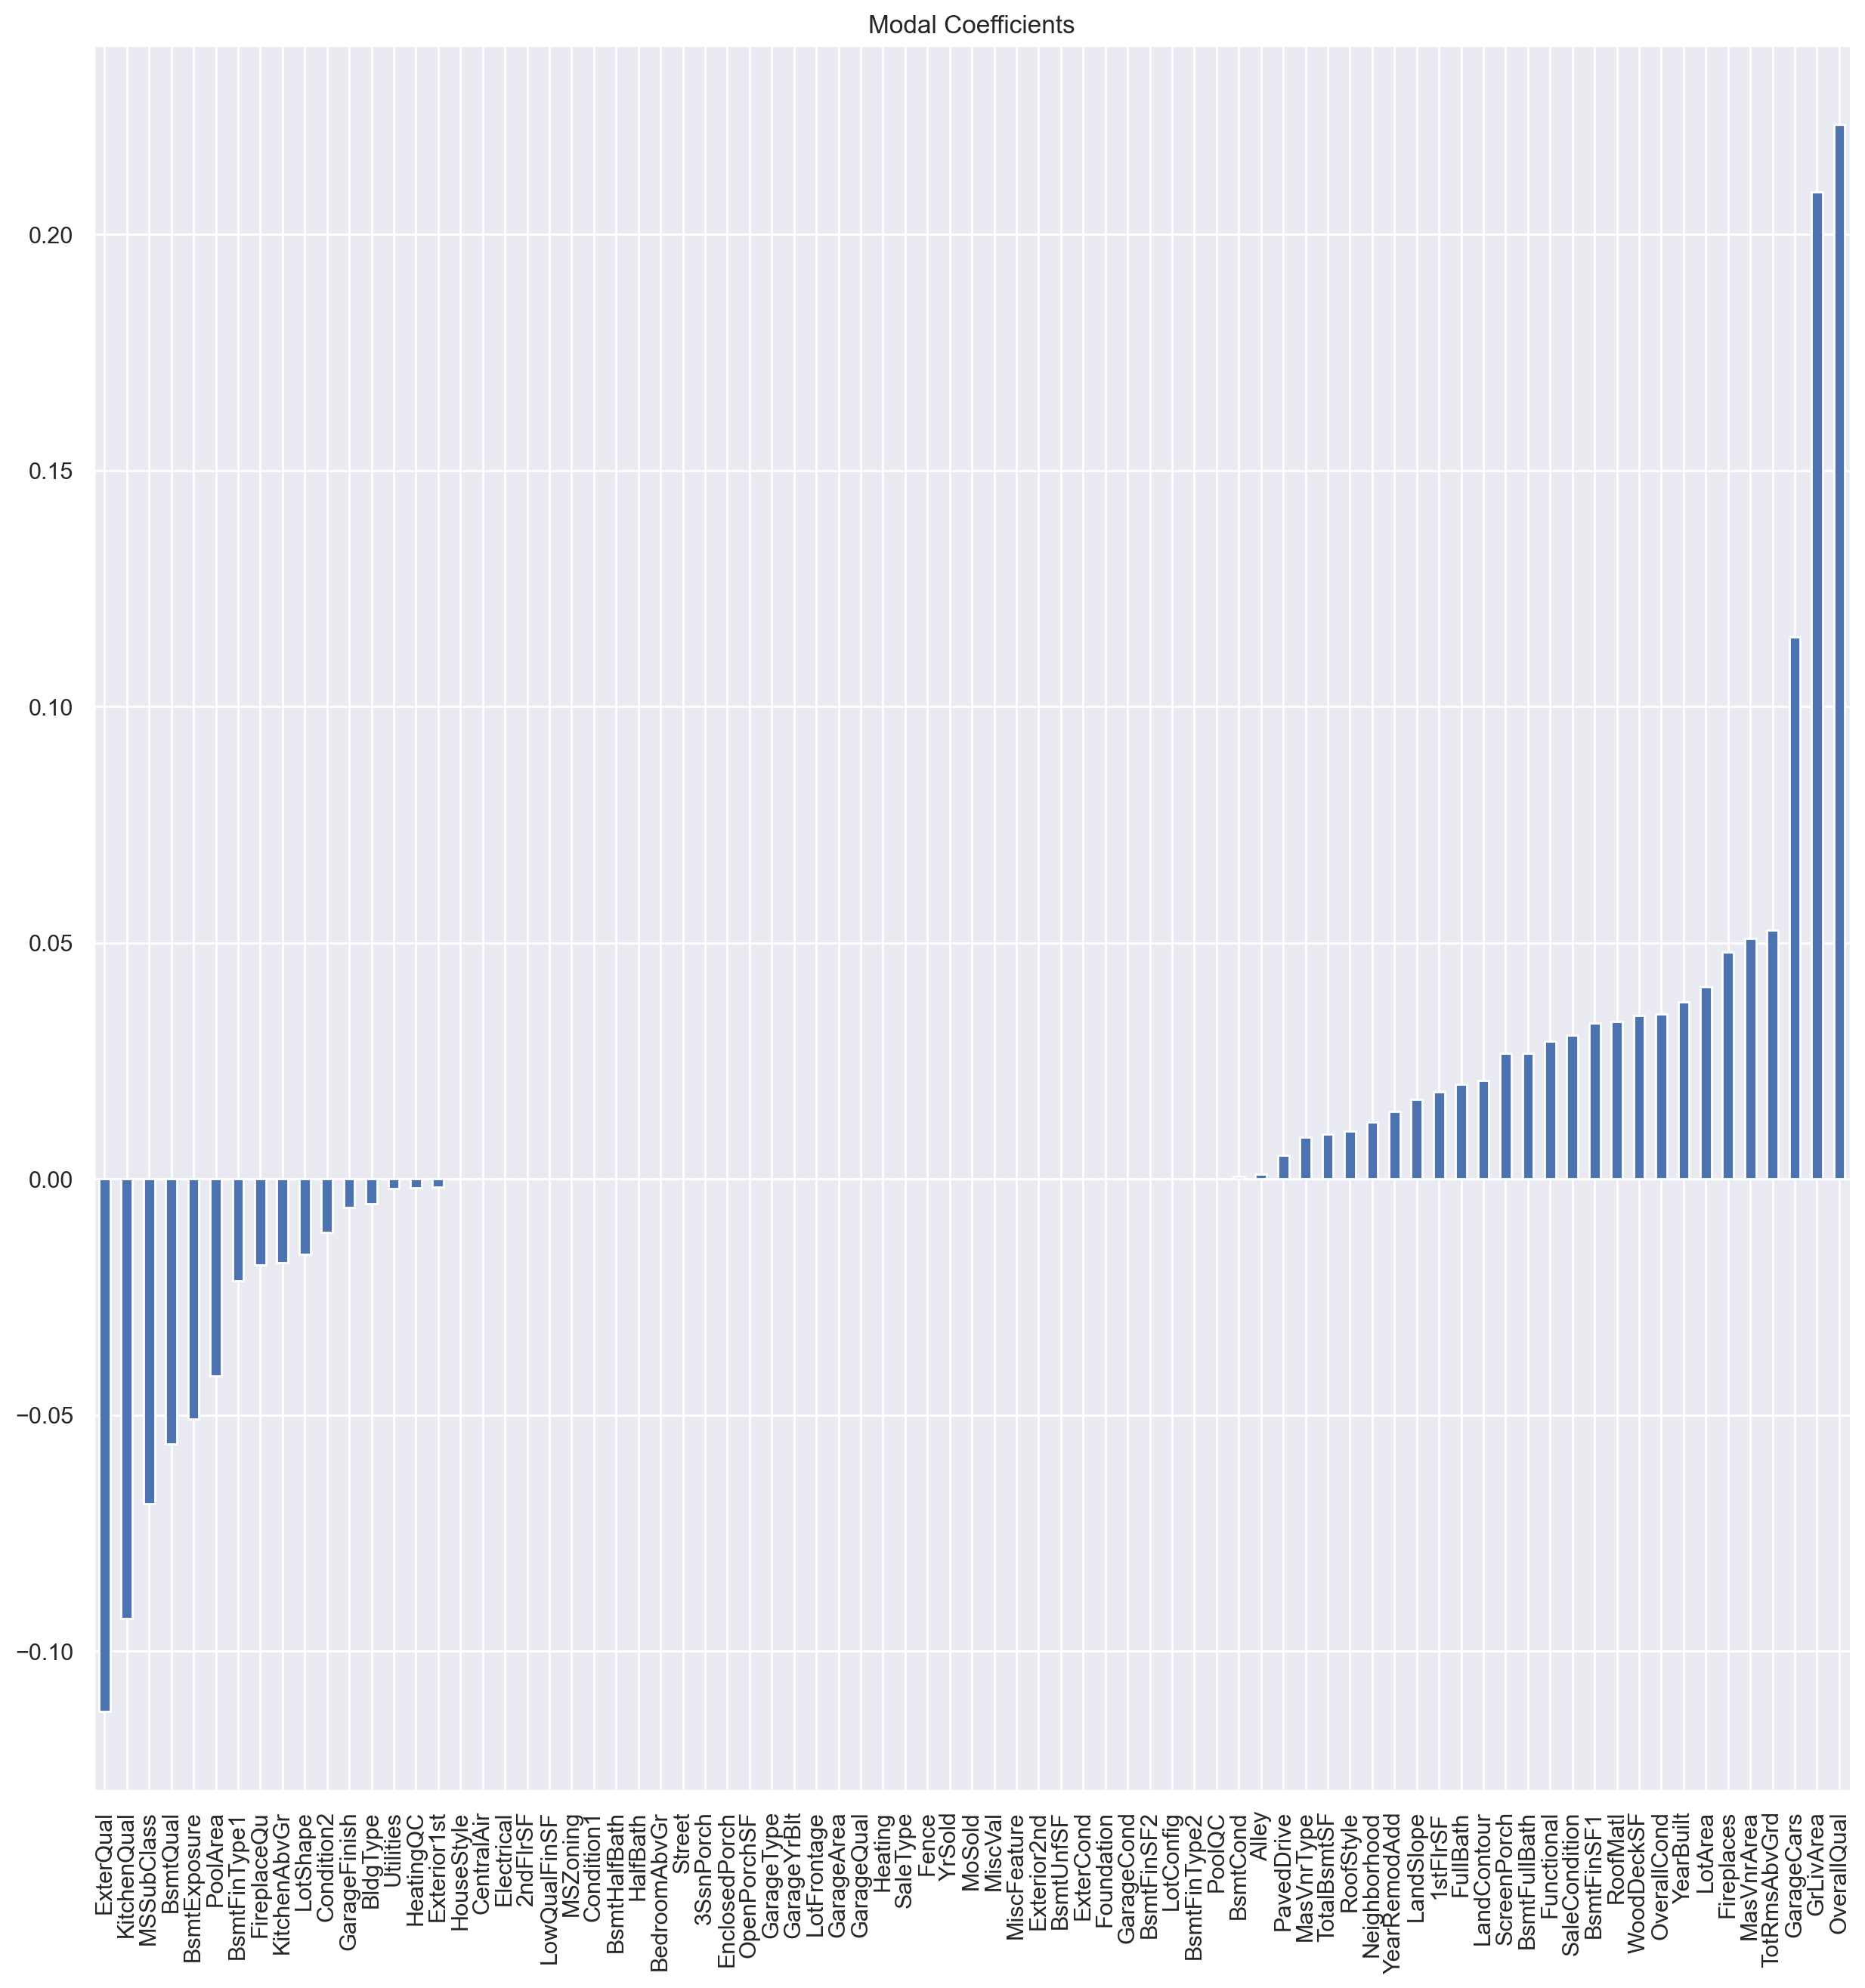

In [101]:
plt.figure(figsize=(15,15))
#checking the magnitude of coefficients
predictors = X_train.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [102]:

lasso_coefficients = lasso.coef_
feature_names = X_train.columns

# Get significant predictors (non-zero coefficients)
significant_predictors_lasso = feature_names[lasso_coefficients != 0]
print("Significant predictors in Lasso regression:", significant_predictors_lasso)
print()


Significant predictors in Lasso regression: Index(['MSSubClass', 'LotArea', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'SaleCondition'], dtype='object')



## Code Related to Subjective Questions

## Question 1
#### Lasso Regression

In [103]:
#Change the alpha value from alpha to 2*alpha (2 times of prev optimal value)
alpha = 2*alpha_l
lasso2 = Lasso(alpha=alpha)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.03660332548812051)

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_l1_pred_train = lasso2.predict(X_train)
y_l1_pred_test = lasso2.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_l1_pred_train)
print("R2 Train : " + str (r2_train_lr))
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_l1_pred_test)
print("R2 Test : " + str (r2_test_lr))
metric5.append(r2_test_lr)
print()
rss1_lr = np.sum(np.square(np.array(y_train) - y_l1_pred_train))
print("RSS Train : " + str (rss1_lr))
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(np.array(y_test) - y_l1_pred_test))
print("RSS Test : " + str (rss2_lr))
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_l1_pred_train)
print()
print("MSE Train : " + str (mse_train_lr))
metric5.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_l1_pred_test)
print("MSE Test : " + str (mse_test_lr))
metric5.append(mse_test_lr)

rmse_train_lr =mse_train_lr**0.5
print("RMSE Train : " + str (rmse_train_lr))
metric5.append(rmse_train_lr)


rmse_test_lr =mse_test_lr**0.5
print("RMSE Test : " + str (rmse_test_lr))
metric5.append(rmse_test_lr)

R2 Train : 0.8070822209840658
R2 Test : 0.8447186806785187

RSS Train : 1675269.3644271991
RSS Test : 353890.05543254357

MSE Train : 0.18196350798745023
MSE Test : 0.17580352149991504
RMSE Train : 0.42657180871155825
RMSE Test : 0.41928930525344316


In [105]:
ls1_metric = pd.Series(metric5, name = 'Lasso Regression-2*Alpha')


#### Ridge Regression

In [106]:
#Change the alpha value from alpha to 2*alpha(2 times of prev optimal value)
alpha = 2*alpha_r
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=19.967699550321754)

In [107]:
# Lets calculate some metrics such as R2 score, RSS and MSE
y_r1_pred_train = ridge2.predict(X_train)
y_r1_pred_test = ridge2.predict(X_test)

metric6 = []
r2_train_lr = r2_score(y_train, y_r1_pred_train)
print("R2 Train : " + str (r2_train_lr))
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_r1_pred_test)
print("R2 Test : " + str (r2_test_lr))
metric6.append(r2_test_lr)
print()

y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

rss1_lr = np.sum(np.square(y_train_arr - y_r1_pred_train))
print("RSS Train : " + str (rss1_lr))
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_arr - y_r1_pred_test))
print("RSS Test : " + str (rss2_lr))
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_r1_pred_train)
print()
print("MSE Train : " + str (mse_train_lr))
metric6.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_r1_pred_test)
print("MSE Test : " + str (mse_test_lr))
metric6.append(mse_test_lr**0.5)

rmse_train_lr =mse_train_lr**0.5
print("RMSE Train : " + str (rmse_train_lr))
metric6.append(rmse_train_lr)


rmse_test_lr =mse_test_lr**0.5
print("RMSE Test : " + str (rmse_test_lr))
metric6.append(rmse_test_lr)

#metric6

#rss = np.sum((y_test_arr - y_r1_pred_test) ** 2)
#print (rss)

R2 Train : 0.8386585973563497
R2 Test : 0.8373563844930851

RSS Train : 155.52806594132758
RSS Test : 80.65280724348905

MSE Train : 0.1521801036607902
MSE Test : 0.18413882932303435
RMSE Train : 0.3901026834831955
RMSE Test : 0.4291140050418238


In [108]:
rg1_metric = pd.Series(metric6, name = 'Ridge Regression-2*Alpha')

In [109]:
betas_l = pd.DataFrame(index=X_train.columns)
betas_l.rows = X_train.columns

# Numpy array to assign
lasso2_coef_ = np.array(lasso2.coef_)
lasso2_coef_ = lasso2_coef_.reshape(-1)
betas_l['Lasso'] = lasso2_coef_

lasso_coef_df = pd.DataFrame(betas_l['Lasso'])
lasso_coef_df = lasso_coef_df.abs()

# Sort the DataFrame by coefficient values to display top features
lasso_top_features = lasso_coef_df.sort_values(by='Lasso', ascending=False).head(10)  

# Print top features and their coefficients
print("Top Features selected by Lasso along with their Coefficients:")
print(lasso_top_features)

Top Features selected by Lasso along with their Coefficients:
                 Lasso
OverallQual   0.250214
GrLivArea     0.209962
GarageCars    0.120345
ExterQual     0.110285
KitchenQual   0.090252
MSSubClass    0.062334
BsmtQual      0.052169
Fireplaces    0.046403
BsmtExposure  0.045057
MasVnrArea    0.040965


<Axes: title={'center': 'Modal Coefficients'}>

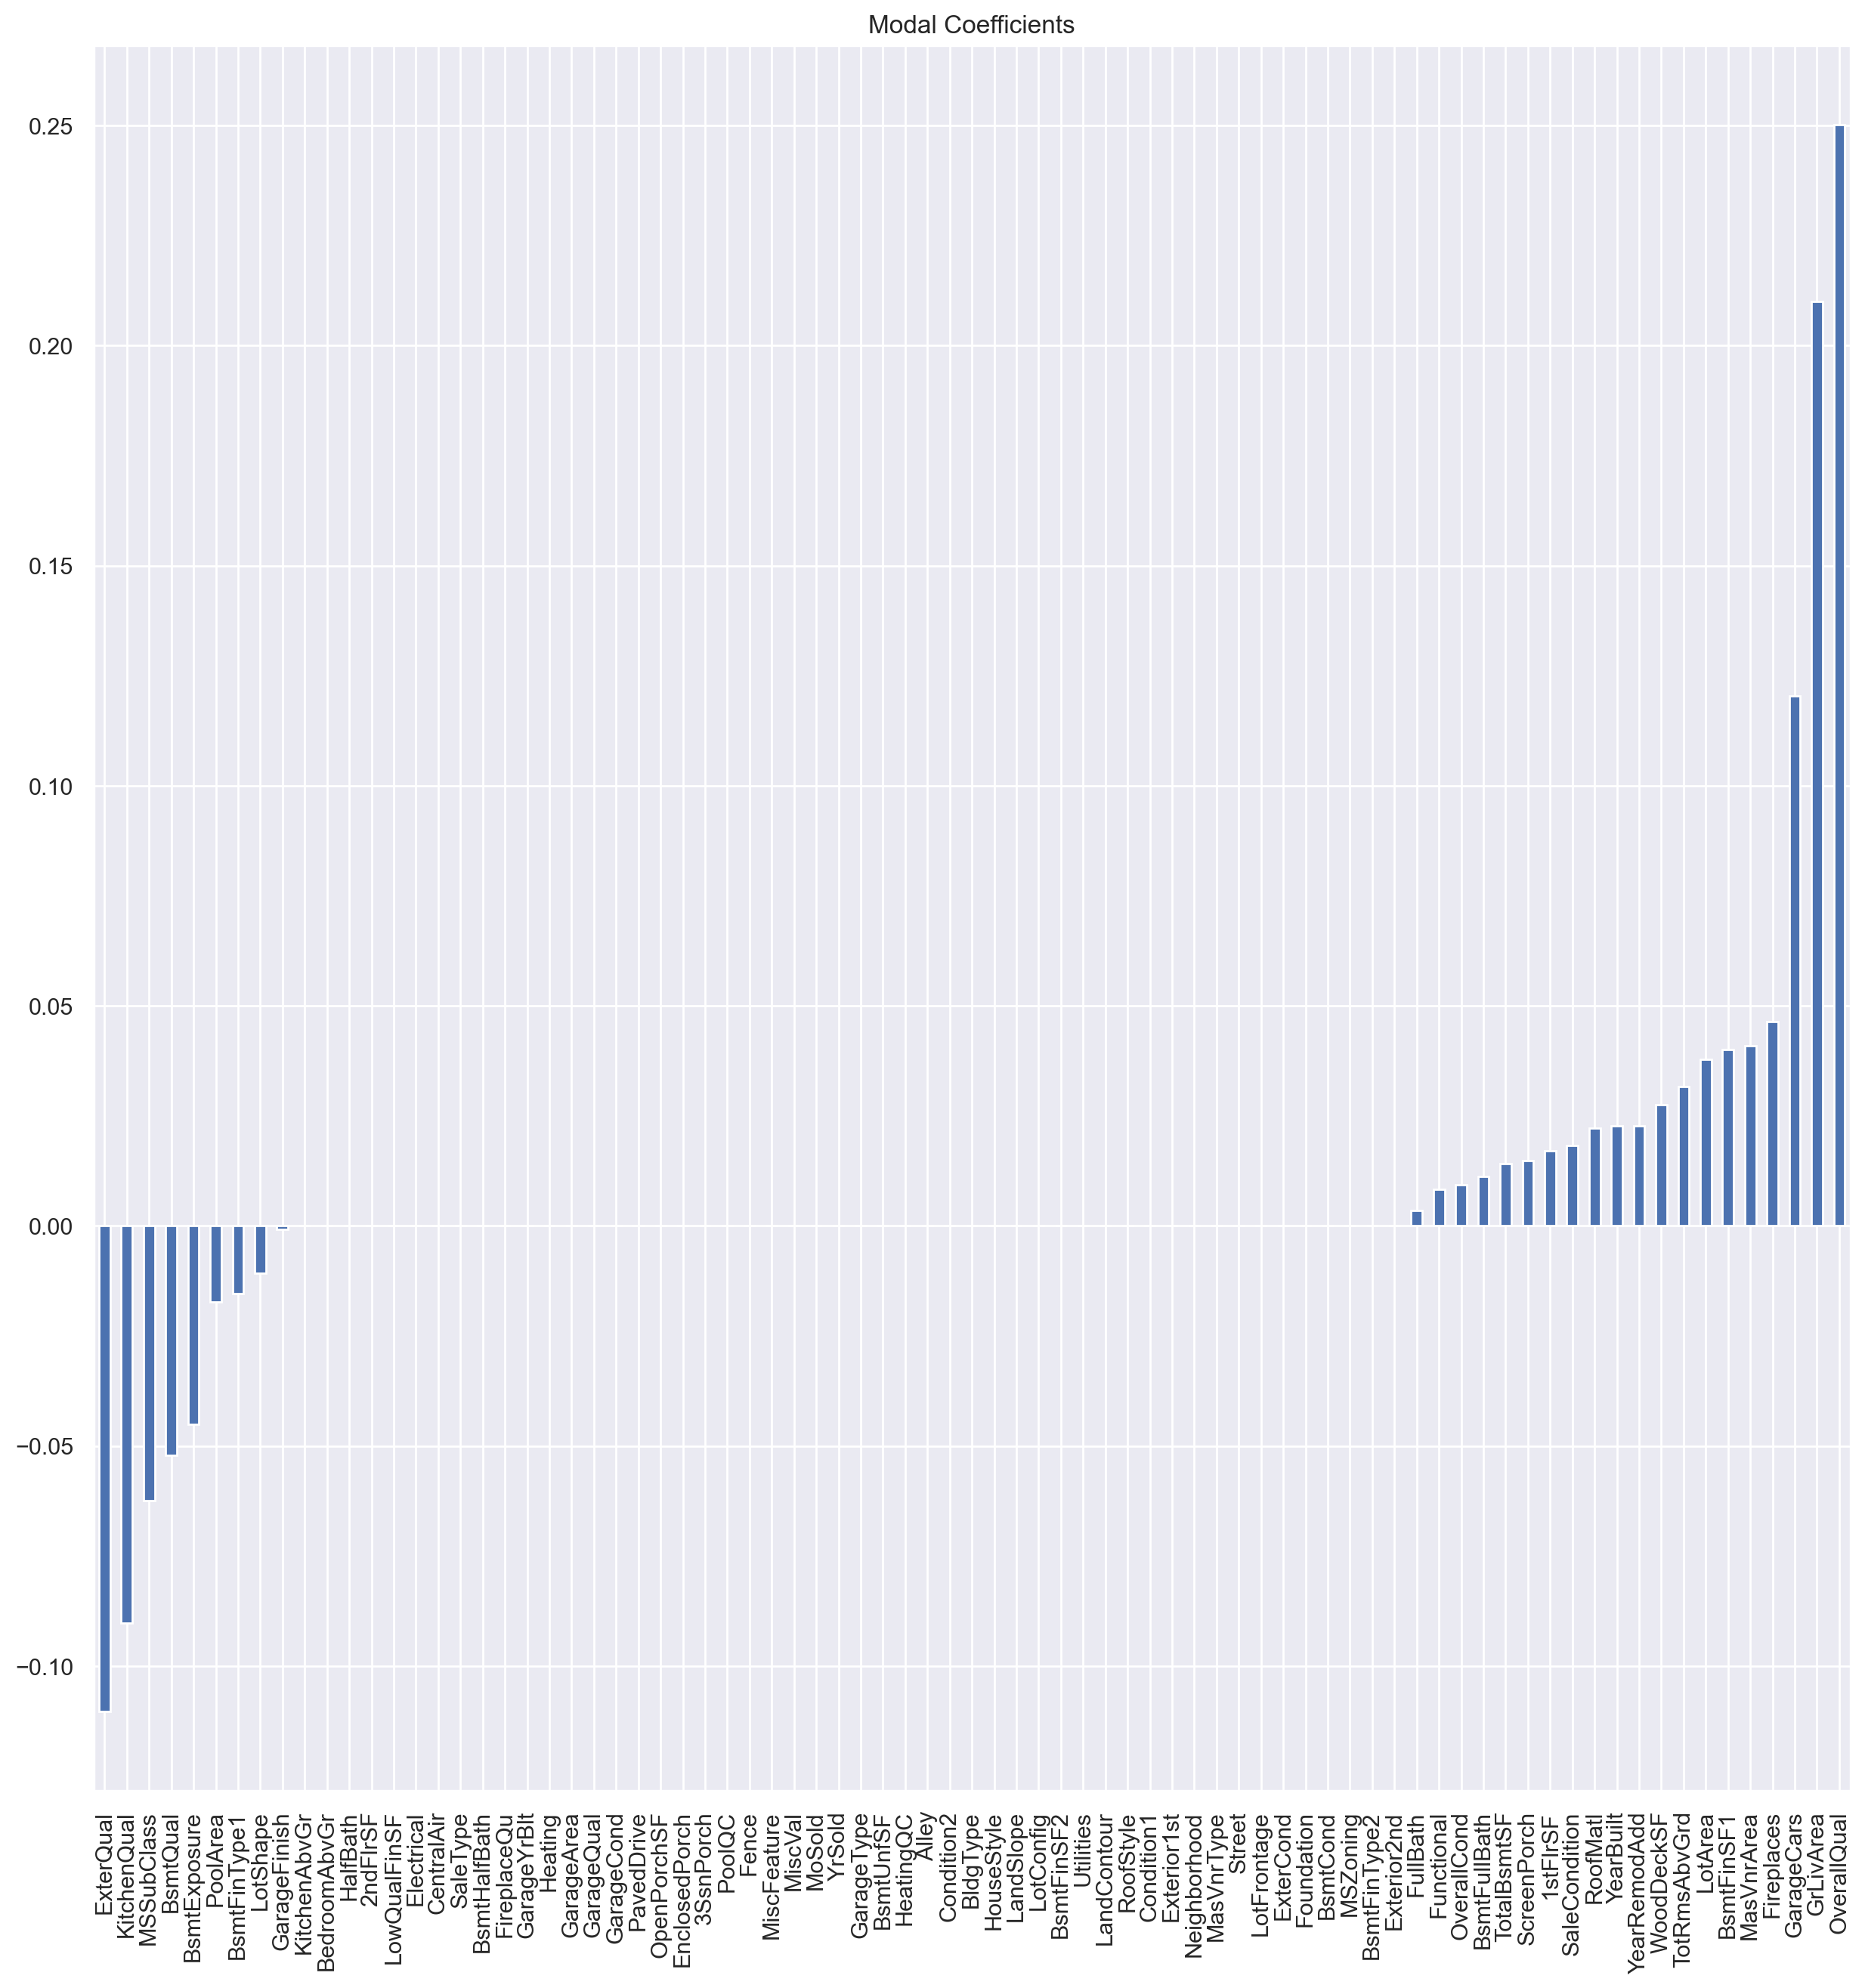

In [110]:
plt.figure(figsize=(15,15))
#checking the magnitude of coefficients
predictors = X_train.columns
coef = pd.Series(lasso2.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

#### Final Metrics 
comparison of the metrics  (alpha and 2* alpha )

In [111]:
final_metric = pd.concat([lr_metric, ls_metric, rg_metric, ls1_metric, rg1_metric], axis = 1)

final_metric

Metric  Linear Regression  Lasso Regression  Ridge Regression  Lasso Regression-2*Alpha  Ridge Regression-2*Alpha
0  R2 Score (Train)           0.832305      8.247994e-01          0.838761              8.070822e-01                  0.838659
1   R2 Score (Test)           0.841391      8.481174e-01          0.837301              8.447187e-01                  0.837356
2       RSS (Train)         161.652803      1.733252e+06        155.428941              1.675269e+06                155.528066
3        RSS (Test)          78.651865      3.638304e+05         80.680028              3.538901e+05                 80.652807
4       MSE (Train)           0.158173      1.652524e-01          0.152083              1.819635e-01                  0.152180
5        MSE (Test)           0.179570      1.719556e-01          0.184201              1.758035e-01                  0.429114
6      RMSE (Train)           0.397710      4.065124e-01          0.389978              4.265718e-01                  0.390103
7       RMSE (Test)           0.423758      4.146753e-01          0.429186              4.192893e-01                  0.429114

## Question 3
#### Removing the top 5 predictors  in the new model to identify new predictors

 As Lasso is more reliable on the feature selection
 Top 5 features in  are  : 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'KitchenQual'
 

In [112]:
X_train2 = X_train.drop(['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'KitchenQual'],axis=1)
X_test2 = X_test.drop(['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'KitchenQual'],axis=1)

In [113]:
# New Model
lasso2_cv = LassoCV(alphas = None, cv = 10, max_iter=100000, fit_intercept=True)
lasso2_cv.fit(X_train2, y_train)
# best alpha parameter

alpha_l2 = lasso2_cv.alpha_
alpha_l2

0.01912548934600116

In [114]:
#Change the alpha value from alpha to 2*alpha (2 times of prev optimal value)
alpha = alpha_l2
lasso3 = Lasso(alpha=alpha)
lasso3.fit(X_train2, y_train)

Lasso(alpha=0.01912548934600116)

In [115]:
alphas2 = np.random.uniform(0, 10, 50)
ridge2_cv = RidgeCV(alphas = alphas2, cv = 10, fit_intercept=True)
ridge2_cv.fit(X_train, y_train)

# best alpha parameter

alpha_r2 = ridge2_cv.alpha_
alpha_r2

9.944355573530125

In [116]:
#Change the alpha value from alpha to 2*alpha(2 times of prev optimal value)
alpha = alpha_r2
ridge3 = Ridge(alpha=alpha)
ridge3.fit(X_train2, y_train)

Ridge(alpha=9.944355573530125)

In [117]:
# Numpy array to assign
ridge3_coef_ = np.array(ridge3.coef_)
lasso3_coef_ = np.array(lasso3.coef_)

ridge3_coef_ = ridge3_coef_.reshape(-1)
lasso3_coef_ = lasso3_coef_.reshape(-1)

In [118]:
betas_l2 = pd.DataFrame(index=X_train2.columns)
betas_l2.rows = X_train2.columns

# Numpy array to assign
lasso3_coef_ = np.array(lasso3.coef_)
lasso3_coef_ = lasso3_coef_.reshape(-1)
betas_l2['Lasso'] = lasso3_coef_

lasso_coef_df = pd.DataFrame(betas_l2['Lasso'])
lasso_coef_df = lasso_coef_df.abs()

# Sort the DataFrame by coefficient values to display top features
lasso_top_features = lasso_coef_df.sort_values(by='Lasso', ascending=False).head(10)  

# Print top features and their coefficients
print("Top Features selected  with their Coefficients:")
print(lasso_top_features)


Top Features selected  with their Coefficients:
                 Lasso
2ndFlrSF      0.159079
1stFlrSF      0.154323
BsmtQual      0.131549
GarageArea    0.127840
TotRmsAbvGrd  0.121038
TotalBsmtSF   0.096490
MasVnrArea    0.088166
Fireplaces    0.087449
KitchenAbvGr  0.074882
YearRemodAdd  0.070836


<Axes: title={'center': 'Modal Coefficients'}>

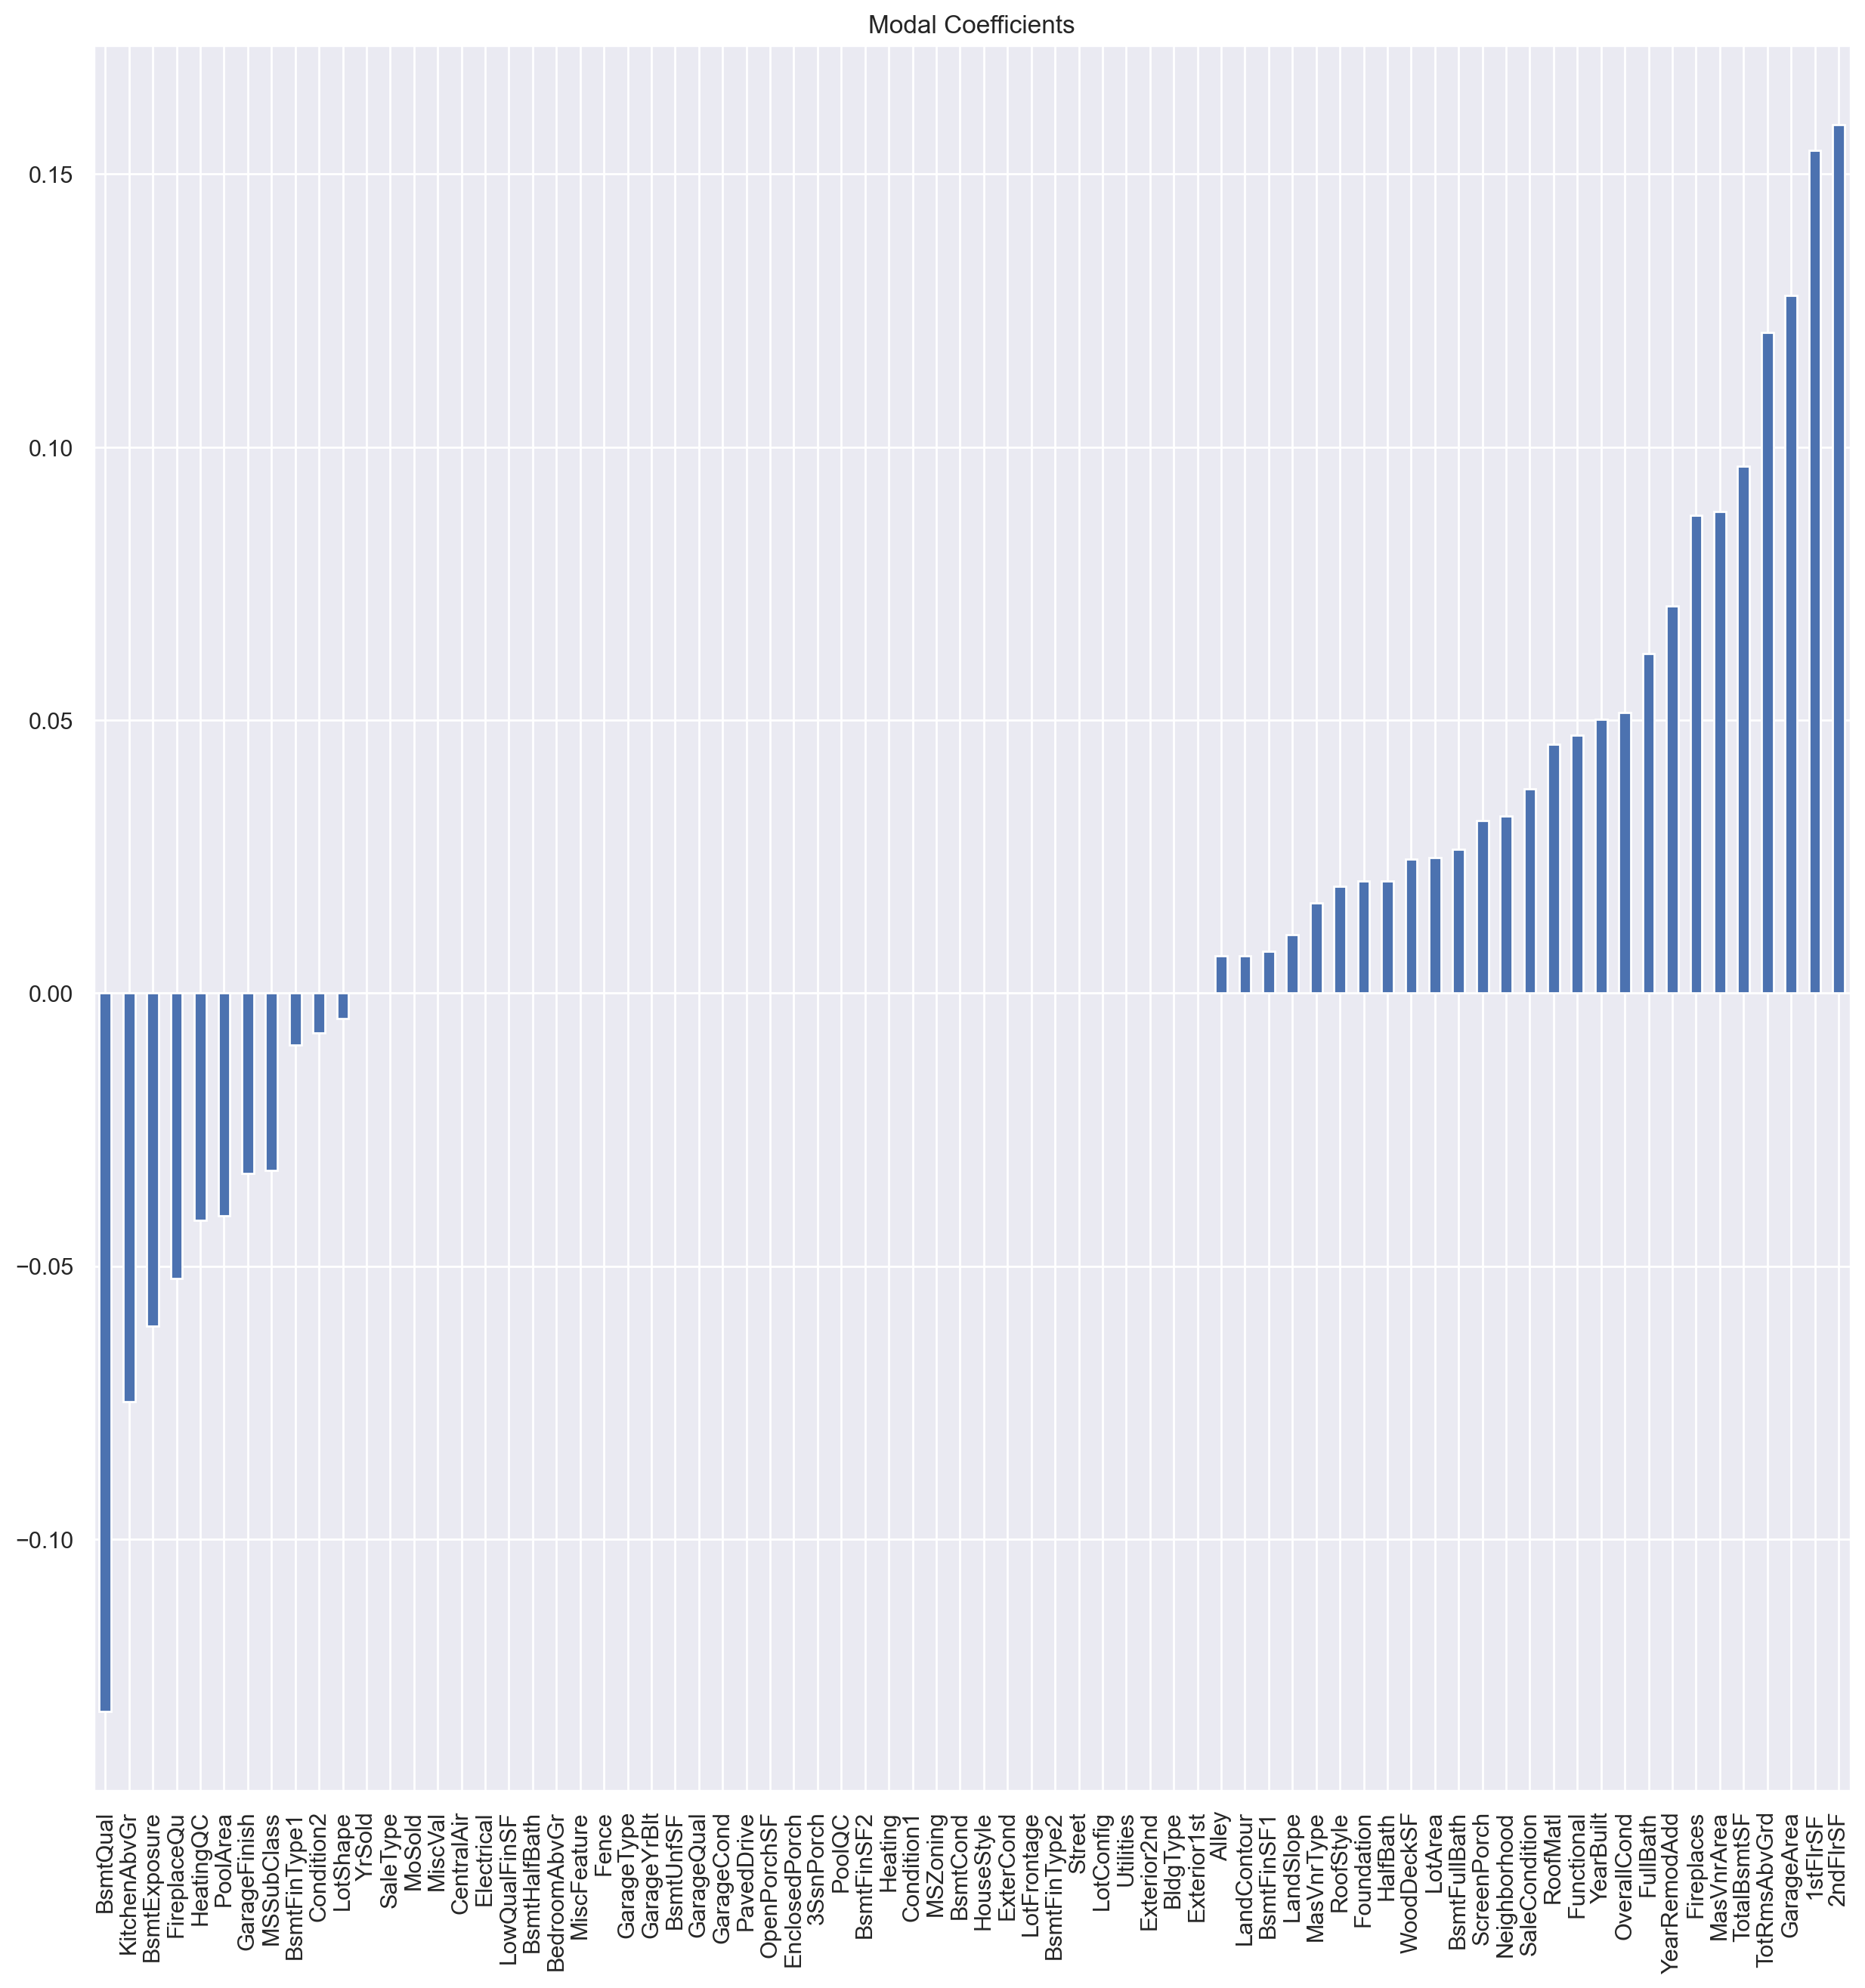

In [119]:
plt.figure(figsize=(15,15))
#checking the magnitude of coefficients
predictors = X_train2.columns
coef = pd.Series(lasso3.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [120]:


ridge3_coef_ = np.array(ridge3.coef_)
lasso3_coef_ = np.array(lasso3.coef_)


ridge3_coef_ = ridge3_coef_.reshape(-1)
lasso3_coef_ = lasso3_coef_.reshape(-1)

In [121]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train2.columns

betas['Ridge3'] = ridge3_coef_
betas['Lasso3'] = lasso3_coef_
pd.set_option('display.max_rows', None)
betas.head(74)

Ridge3    Lasso3
MSSubClass    -0.048618 -0.032454
MSZoning       0.012942 -0.000000
LotFrontage   -0.009593 -0.000000
LotArea        0.033393  0.024868
Street         0.012636  0.000000
Alley          0.029085  0.006761
LotShape      -0.009947 -0.004693
LandContour    0.035013  0.006893
Utilities     -0.018673 -0.000000
LotConfig      0.008062 -0.000000
LandSlope      0.029784  0.010694
Neighborhood   0.047462  0.032483
Condition1    -0.010042 -0.000000
Condition2    -0.039147 -0.007231
BldgType      -0.014646 -0.000000
HouseStyle    -0.039842 -0.000000
OverallCond    0.086221  0.051362
YearBuilt      0.116867  0.050151
YearRemodAdd   0.055376  0.070836
RoofStyle      0.038526  0.019580
RoofMatl       0.053866  0.045565
Exterior1st   -0.067013 -0.000000
Exterior2nd    0.044680 -0.000000
MasVnrType     0.035858  0.016576
MasVnrArea     0.100635  0.088166
ExterCond     -0.000787  0.000000
Foundation     0.035553  0.020483
BsmtQual      -0.113014 -0.131549
BsmtCond       0.010519  0.000000
BsmtExposure  -0.073544 -0.060964
BsmtFinType1  -0.021887 -0.009530
BsmtFinSF1     0.017868  0.007699
BsmtFinType2   0.016190 -0.000000
BsmtFinSF2     0.028845  0.000000
BsmtUnfSF      0.021360 -0.000000
TotalBsmtSF    0.050697  0.096490
Heating       -0.014833 -0.000000
HeatingQC     -0.036900 -0.041590
CentralAir    -0.032498  0.000000
Electrical    -0.027694 -0.000000
1stFlrSF       0.158644  0.154323
2ndFlrSF       0.199510  0.159079
LowQualFinSF   0.020627  0.000000
BsmtFullBath   0.047928  0.026364
BsmtHalfBath   0.021328  0.000000
FullBath       0.078792  0.062122
HalfBath       0.028921  0.020541
BedroomAbvGr  -0.058669 -0.000000
KitchenAbvGr  -0.089687 -0.074882
TotRmsAbvGrd   0.162011  0.121038
Functional     0.066794  0.047266
Fireplaces     0.082668  0.087449
FireplaceQu   -0.066090 -0.052302
GarageType     0.002953 -0.000000
GarageYrBlt   -0.023074 -0.000000
GarageFinish  -0.029753 -0.033048
GarageArea     0.131869  0.127840
GarageQual    -0.042132 -0.000000
GarageCond     0.032331  0.000000
PavedDrive     0.008869  0.000000
WoodDeckSF     0.035185  0.024591
OpenPorchSF   -0.000214  0.000000
EnclosedPorch  0.028862  0.000000
3SsnPorch     -0.000842  0.000000
ScreenPorch    0.040766  0.031601
PoolArea      -0.066386 -0.040840
PoolQC         0.000184  0.000000
Fence         -0.007138  0.000000
MiscFeature   -0.004610 -0.000000
MiscVal       -0.001159 -0.000000
MoSold         0.001899  0.000000
YrSold        -0.014442 -0.000000
SaleType      -0.015381 -0.000000
SaleCondition  0.050943  0.037476

In [122]:
# Lets calculate some metrics such as R2 score, RSS and MSE
y_r3_pred_train = ridge3.predict(X_train2)
y_r3_pred_test = ridge3.predict(X_test2)

metric7 = []
r2_train_lr = r2_score(y_train, y_r3_pred_train)
print("R2 Train : " + str (r2_train_lr))
metric7.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_r3_pred_test)
print("R2 Test : " + str (r2_test_lr))
metric7.append(r2_test_lr)
print()

y_train_arr = np.array(y_train)
y_test_arr = np.array(y_test)

rss1_lr = np.sum(np.square(y_train_arr - y_r3_pred_train))
print("RSS Train : " + str (rss1_lr))
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test_arr - y_r3_pred_test))
print("RSS Test : " + str (rss2_lr))
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_r3_pred_train)
print()
print("MSE Train : " + str (mse_train_lr))
metric7.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_r3_pred_test)
print("MSE Test : " + str (mse_test_lr))
metric7.append(mse_test_lr**0.5)

rmse_train_lr =mse_train_lr**0.5
print("RMSE Train : " + str (rmse_train_lr))
metric7.append(rmse_train_lr)


rmse_test_lr =mse_test_lr**0.5
print("RMSE Test : " + str (rmse_test_lr))
metric7.append(rmse_test_lr)

R2 Train : 0.8052541974663738
R2 Test : 0.8169791362406709

RSS Train : 187.72886265990698
RSS Test : 90.75761381909558

MSE Train : 0.1836877325439403
MSE Test : 0.20720916397053785
RMSE Train : 0.42858806859727244
RMSE Test : 0.45520233300208146


In [123]:
rg3_metric = pd.Series(metric7, name = 'Ridge Regression-3')

In [124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_l3_pred_train = lasso3.predict(X_train2)
y_l3_pred_test = lasso3.predict(X_test2)

metric8 = []
r2_train_lr = r2_score(y_train, y_l3_pred_train)
print("R2 Train : " + str (r2_train_lr))
metric8.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_l3_pred_test)
print("R2 Test : " + str (r2_test_lr))
metric8.append(r2_test_lr)
print()
rss1_lr = np.sum(np.square(np.array(y_train) - y_l3_pred_train))
print("RSS Train : " + str (rss1_lr))
metric8.append(rss1_lr)

rss2_lr = np.sum(np.square(np.array(y_test) - y_l3_pred_test))
print("RSS Test : " + str (rss2_lr))
metric8.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_l3_pred_train)
print()
print("MSE Train : " + str (mse_train_lr))
metric8.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_l3_pred_test)
print("MSE Test : " + str (mse_test_lr))
metric8.append(mse_test_lr)

rmse_train_lr =mse_train_lr**0.5
print("RMSE Train : " + str (rmse_train_lr))
metric8.append(rmse_train_lr)


rmse_test_lr =mse_test_lr**0.5
print("RMSE Test : " + str (rmse_test_lr))
metric8.append(rmse_test_lr)

R2 Train : 0.787902255917031
R2 Test : 0.820399010079921

RSS Train : 1683995.552862879
RSS Test : 353113.84183370596

MSE Train : 0.2000543949159492
MSE Test : 0.2033373146930282
RMSE Train : 0.4472744067303082
RMSE Test : 0.45092938991934006


In [125]:
ls3_metric = pd.Series(metric8, name = 'Lasso Regression3')

In [126]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)','RMSE (Test)']
        }

lr3_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

final_metric2 = pd.concat([lr3_metric, ls3_metric, rg3_metric], axis = 1)

final_metric2

Metric  Lasso Regression3  Ridge Regression-3
0  R2 Score (Train)       7.879023e-01            0.805254
1   R2 Score (Test)       8.203990e-01            0.816979
2       RSS (Train)       1.683996e+06          187.728863
3        RSS (Test)       3.531138e+05           90.757614
4       MSE (Train)       2.000544e-01            0.183688
5        MSE (Test)       2.033373e-01            0.455202
6      RMSE (Train)       4.472744e-01            0.428588
7       RMSE (Test)       4.509294e-01            0.455202